In [6]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')

import data

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)
rc("savefig", dpi=300)
rc("figure", dpi=192)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())




'2018-02-06 12:34:46.218062'

In [9]:
RCP8_IPSL_plotter = h5py.File('/Volumes/photo_video/Scenarios/96ts_T_only_RCP8_IPSL2015_2070.mat', 'r')
RCP4_IPSL_plotter = h5py.File('/Volumes/photo_video/Scenarios/96ts_T_only_RCP8_IPSL2015_2070.mat', 'r')
RCP8_GFDL_plotter = h5py.File('/Volumes/photo_video/Scenarios/96ts_T_only_RCP8_GFDL2015_2070.mat', 'r')
RCP4_GFDL_plotter = h5py.File('/Volumes/photo_video/Scenarios/96ts_T_only_RCP4_GFDL2015_2070.mat', 'r')
RCP8_NorESM_plotter = h5py.File('/Volumes/photo_video/Scenarios/96ts_T_only_RCP45_NorESM2015_2070.mat', 'r')
RCP4_NorESM_plotter = h5py.File('/Volumes/photo_video/Scenarios/96ts_T_only_RCP45_NorESM2015_2070.mat', 'r')
hist_20y_plotter = h5py.File('/Volumes/photo_video/Scenarios/96ts_T_only_full_scen_base_historical_20y2015_2070.mat', 'r')

In [13]:
days = np.array(hist_20y_plotter['MyLake_results']['basin1']['concentrations']['C'])[:,8]

In [11]:
names_scen = ['RCP8 IPSL 2015-2070', 'RCP4 IPSL 2015-2070', 'RCP8 GFDL 2015-2070', 'RCP4 GFDL 2015-2070', 'RCP8 NorESM 2015-2070', 'RCP4 NorESM 2015-2070', 'Historical 1995-2015']

In [14]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Phy = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Phy[n] = np.array(res['MyLake_results']['basin1']['concentrations']['C'])[:,8] + np.array(res['MyLake_results']['basin1']['concentrations']['Chl'])[:,8]
    
Phy['Year'] = Phy.Date.dt.year
Phy['Month'] = Phy.Date.dt.month
Phy['Day'] = Phy.Date.dt.day
Phy['DOY'] = Phy.Date.dt.dayofyear
Phy['WOY'] = Phy.Date.dt.weekofyear
# Phy = Phy[-365*55:]

In [15]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
PO4_4m = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    PO4_4m[n] = np.array(res['MyLake_results']['basin1']['concentrations']['P'])[:,8]
    
PO4_4m['Year'] = PO4_4m.Date.dt.year
PO4_4m['Month'] = PO4_4m.Date.dt.month
PO4_4m['Day'] = PO4_4m.Date.dt.day
PO4_4m['DOY'] = PO4_4m.Date.dt.dayofyear
PO4_4m['WOY'] = PO4_4m.Date.dt.weekofyear
# PO4_4m = PO4_4m[-365*55:]

In [16]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Oxy = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Oxy[n] = np.array(res['MyLake_results']['basin1']['concentrations']['O2'])[:,81]
    
Oxy['Year'] = Oxy.Date.dt.year
Oxy['Month'] = Oxy.Date.dt.month
Oxy['Day'] = Oxy.Date.dt.day
Oxy['DOY'] = Oxy.Date.dt.dayofyear
Oxy['WOY'] = Oxy.Date.dt.weekofyear
# Oxy = Oxy[-365*55:]

In [22]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tw_mean = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Tw_mean[n] = np.mean(np.array(res['MyLake_results']['basin1']['T']), axis=1)
    
Tw_mean['Year'] = Tw_mean.Date.dt.year
Tw_mean['Month'] = Tw_mean.Date.dt.month
Tw_mean['Day'] = Tw_mean.Date.dt.day
Tw_mean['DOY'] = Tw_mean.Date.dt.dayofyear
Tw_mean['WOY'] = Tw_mean.Date.dt.weekofyear
# Tw_mean = Tw_mean[-365*55:]

In [25]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tw_4m = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Tw_4m[n] = np.mean(np.array(res['MyLake_results']['basin1']['T'][:,0:9]), axis=1)
    
Tw_4m['Year'] = Tw_4m.Date.dt.year
Tw_4m['Month'] = Tw_4m.Date.dt.month
Tw_4m['Day'] = Tw_4m.Date.dt.day
Tw_4m['DOY'] = Tw_4m.Date.dt.dayofyear
Tw_4m['WOY'] = Tw_4m.Date.dt.weekofyear
# Tw_4m = Tw_4m[-365*55:]

In [27]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Kz_mean = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Kz_mean[n] = np.mean(np.array(res['MyLake_results']['basin1']['K']), axis=1)
    
Kz_mean['Year'] = Kz_mean.Date.dt.year
Kz_mean['Month'] = Kz_mean.Date.dt.month
Kz_mean['Day'] = Kz_mean.Date.dt.day
Kz_mean['DOY'] = Kz_mean.Date.dt.dayofyear
Kz_mean['WOY'] = Kz_mean.Date.dt.weekofyear
# Kz_mean = Kz_mean[-365*55:]

In [29]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tsed = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Tsed[n] = np.array(res['MyLake_results']['basin1']['T'])[:, 76]
    
Tsed['Year'] = Tsed.Date.dt.year
Tsed['Month'] = Tsed.Date.dt.month
Tsed['Day'] = Tsed.Date.dt.day
Tsed['DOY'] = Tsed.Date.dt.dayofyear
Tsed['WOY'] = Tsed.Date.dt.weekofyear
# Tsed = Tsed[-365*55:]

In [30]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Ice = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Ice[n] = np.array(res['MyLake_results']['basin1']['His'])[:, 0]
    
Ice['Year'] = Ice.Date.dt.year
Ice['Month'] = Ice.Date.dt.month
Ice['Day'] = Ice.Date.dt.day
Ice['DOY'] = Ice.Date.dt.dayofyear
Ice['WOY'] = Ice.Date.dt.weekofyear
# Ice = Ice[-365*55:]

In [31]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tair = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Tair[n] =np.array(res['MyLake_results']['basin1']['Wt'])[2, :]
    
Tair['Year'] = Tair.Date.dt.year
Tair['Month'] = Tair.Date.dt.month
Tair['Day'] = Tair.Date.dt.day
Tair['DOY'] = Tair.Date.dt.dayofyear
Tair['WOY'] = Tair.Date.dt.weekofyear
# Tair = Tair[-365*55:]

In [32]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
pycno_depth = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    pycno_depth[n] = np.array(res['MyLake_results']['basin1']['MixStat'])[:, 11]
    
pycno_depth['Year'] = pycno_depth.Date.dt.year
pycno_depth['Month'] = pycno_depth.Date.dt.month
pycno_depth['Day'] = pycno_depth.Date.dt.day
pycno_depth['DOY'] = pycno_depth.Date.dt.dayofyear
pycno_depth['WOY'] = pycno_depth.Date.dt.weekofyear
# pycno_depth = pycno_depth[-365*55:]

In [33]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Ice_bool = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Ice_bool[n] = np.array(res['MyLake_results']['basin1']['His'])[:, 6]
    
Ice_bool['Year'] = Ice_bool.Date.dt.year
Ice_bool['Month'] = Ice_bool.Date.dt.month
Ice_bool['Day'] = Ice_bool.Date.dt.day
Ice_bool['DOY'] = Ice_bool.Date.dt.dayofyear
Ice_bool['WOY'] = Ice_bool.Date.dt.weekofyear
# Ice_bool = Ice_bool[-365*55:]

In [34]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
P_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    P_fx[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['PO4'])

    
P_fx['Year'] = P_fx.Date.dt.year
P_fx['Month'] = P_fx.Date.dt.month
P_fx['Day'] = P_fx.Date.dt.day
P_fx['DOY'] = P_fx.Date.dt.dayofyear
P_fx['WOY'] = P_fx.Date.dt.weekofyear
# P_fx = P_fx[-365*55:]

In [35]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Chl_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Chl_fx[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Chl'])
    
Chl_fx['Year'] = Chl_fx.Date.dt.year
Chl_fx['Month'] = Chl_fx.Date.dt.month
Chl_fx['Day'] = Chl_fx.Date.dt.day
Chl_fx['DOY'] = Chl_fx.Date.dt.dayofyear
Chl_fx['WOY'] = Chl_fx.Date.dt.weekofyear
# Chl_fx = Chl_fx[-365*55:]

In [36]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Fe2_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Fe2_fx[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Fe2']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['Fe2'])
    
Fe2_fx['Year'] = Fe2_fx.Date.dt.year
Fe2_fx['Month'] = Fe2_fx.Date.dt.month
Fe2_fx['Day'] = Fe2_fx.Date.dt.day
Fe2_fx['DOY'] = Fe2_fx.Date.dt.dayofyear
Fe2_fx['WOY'] = Fe2_fx.Date.dt.weekofyear
# Fe2_fx = Fe2_fx[-365*55:]

In [37]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
O2_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    O2_fx[n] = -(np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['O2']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['O2']))
    
O2_fx['Year'] = O2_fx.Date.dt.year
O2_fx['Month'] = O2_fx.Date.dt.month
O2_fx['Day'] = O2_fx.Date.dt.day
O2_fx['DOY'] = O2_fx.Date.dt.dayofyear
O2_fx['WOY'] = O2_fx.Date.dt.weekofyear
# O2_fx = O2_fx[-365*55:]

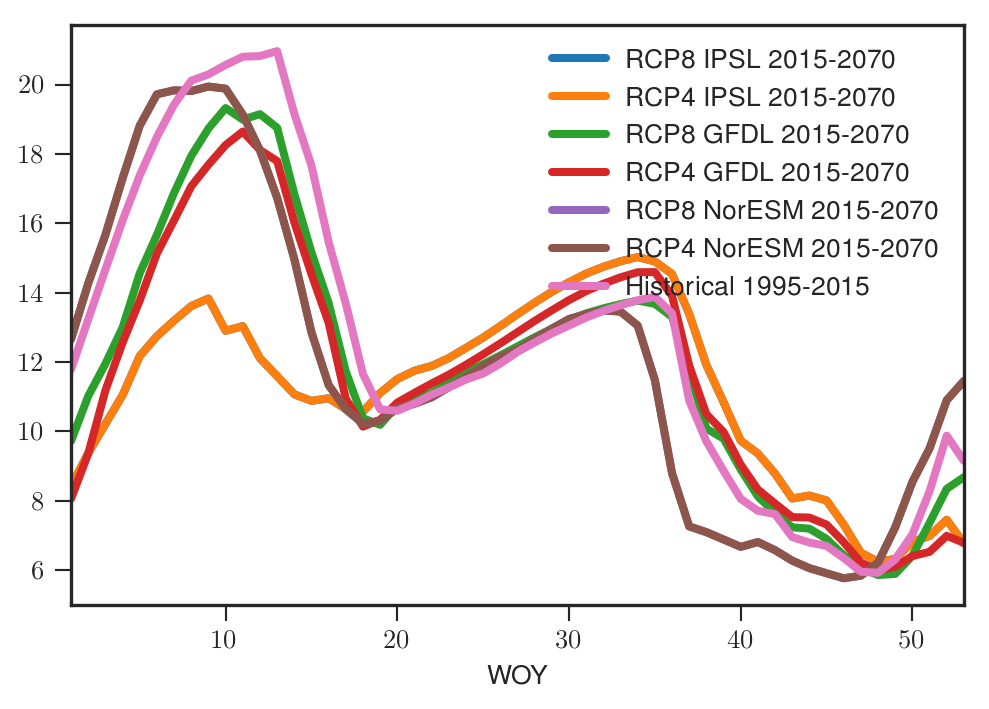

In [38]:
Fe2_fx[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', lw=3)

Text(0.5,1,'2040-2050 Mean Oxy')

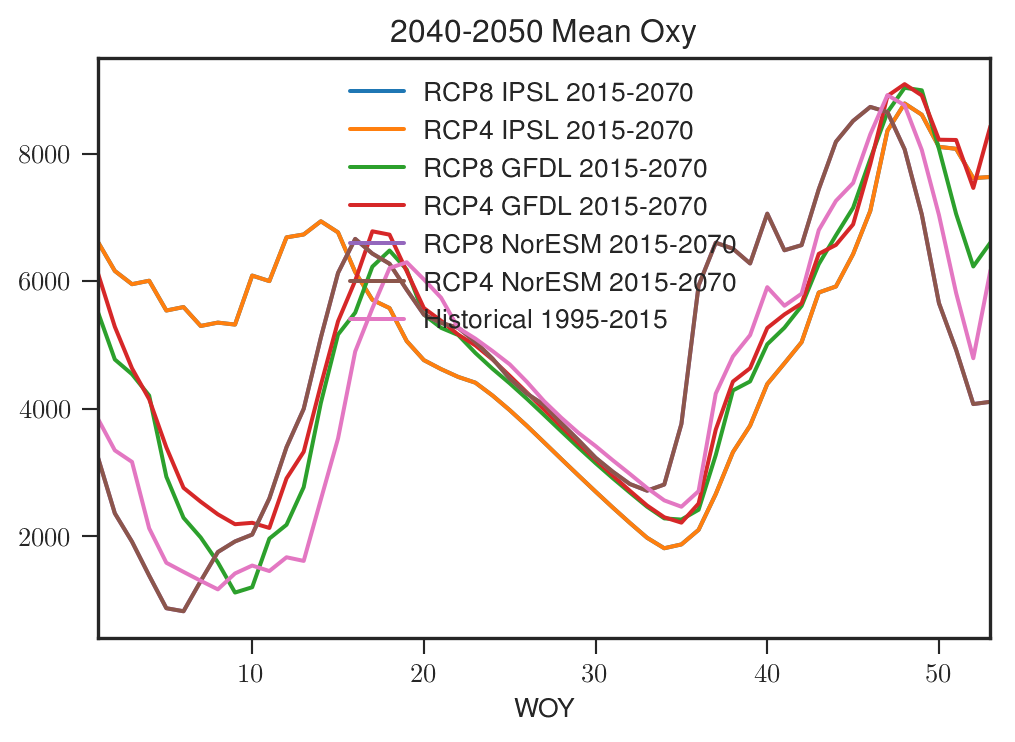

In [39]:
Oxy[-365*55:].groupby(['WOY']).mean()[names_scen].plot()
# plt.xlim(120,200)
plt.title('2040-2050 Mean Oxy')

(1, 53)

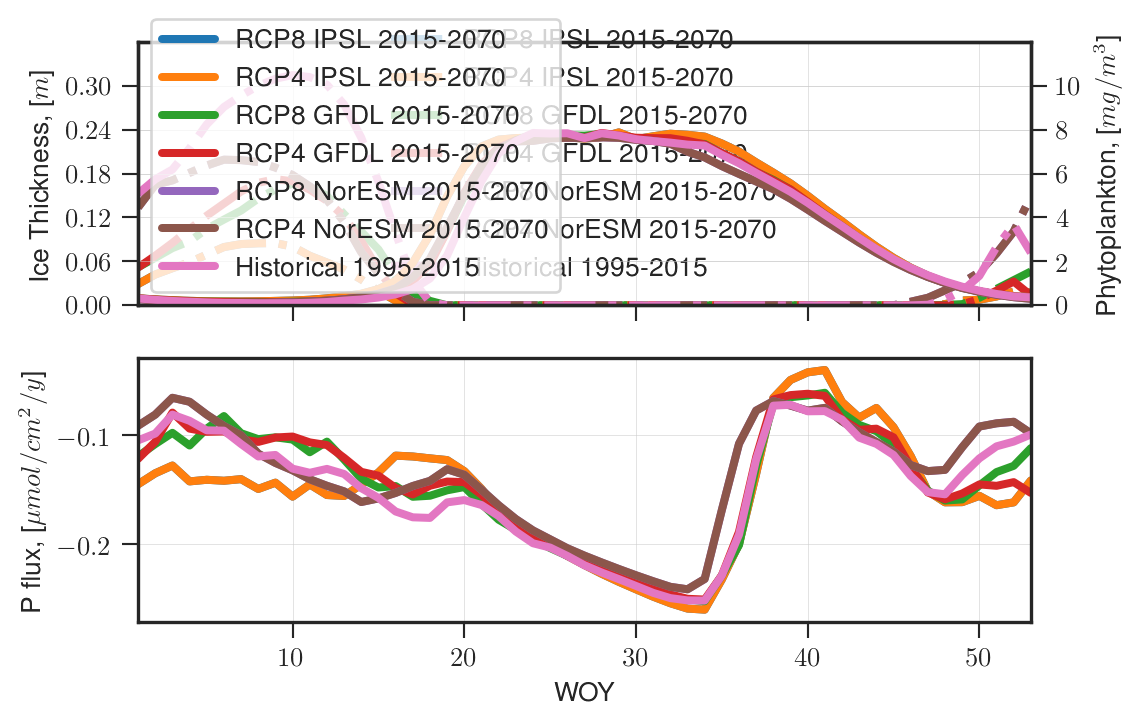

In [45]:
ax0 = plt.subplot(211)
ax1 = ax0.twinx()

ax1.set_ylim(0,12)
ax0.set_ylim(0,0.36)


Phy[-365*45:].groupby(['WOY']).mean()[names_scen].plot(ax=ax1, lw=3)
Ice[-365*45:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-.', ax=ax0, lw=3)

ax1.set_yticks(np.arange(0, 12, 1.0*2))
ax0.set_yticks(np.arange(0, 0.36, 0.03*2))
ax0.set_ylabel('Ice Thickness, [$m$]')
ax1.set_ylabel('Phytoplankton, [$mg/m^3$]')

ax0.set_xlabel('Week of the year')
ax1.legend(frameon=1)

ax2 = plt.subplot(212)
P_fx[-365*45:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', lw=3, ax=ax2)
ax2.legend_.remove()
ax2.set_ylabel('P flux, [$\mu mol/cm^2/y$]')
# ax2.set_ylim(0.6, 0.9)

ax0.grid(linestyle='-', linewidth=0.2)
ax1.grid(linestyle='-', linewidth=0.2)
ax2.grid(linestyle='-', linewidth=0.2)

plt.xlim(1,53)
# plt.title('2040-2050 Mean Phy')

In [46]:
clr_pltt = sns.color_palette("Paired", 6)[::-1] + [(0,0,0)]

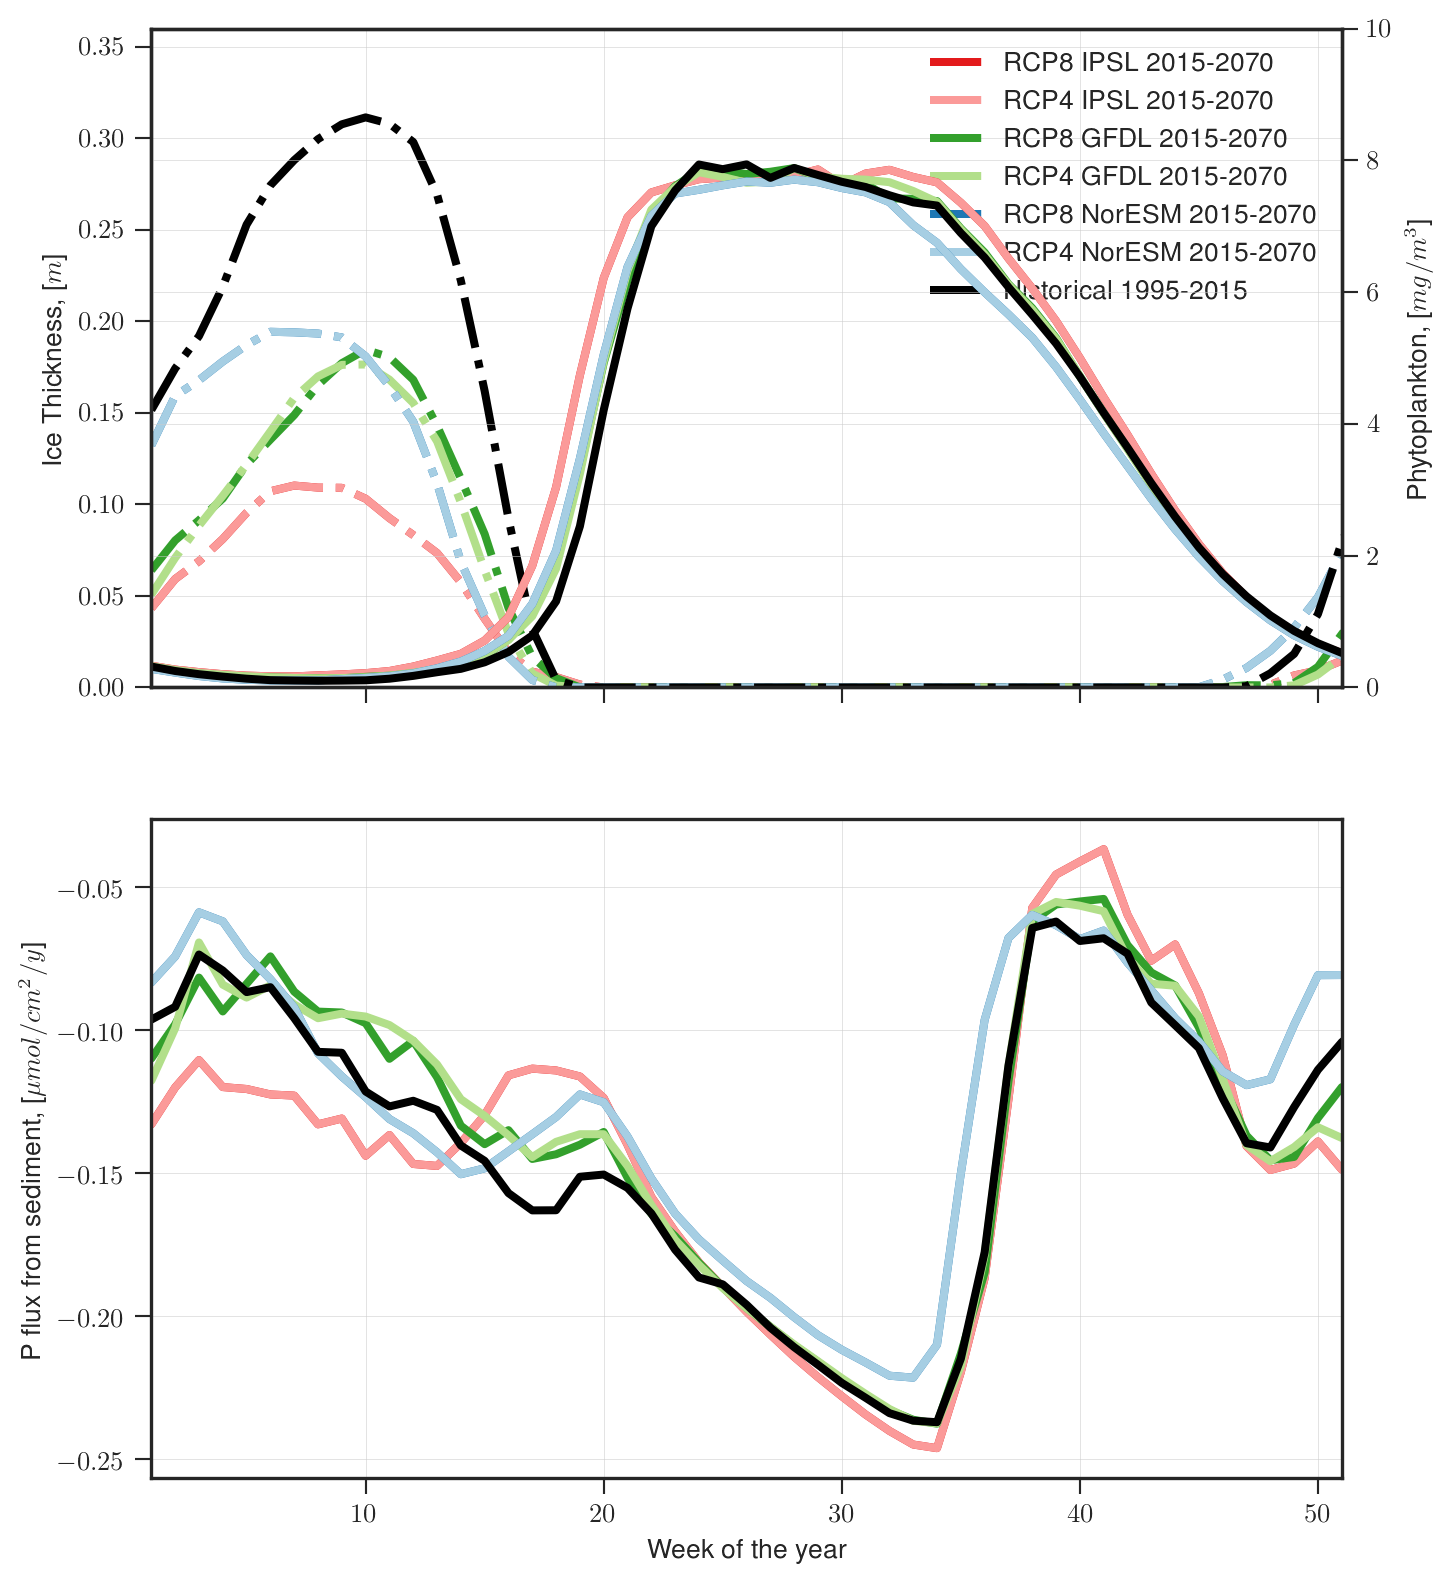

In [47]:
plt.figure(figsize=(8,10))
ax0 = plt.subplot(211)
ax1 = ax0.twinx()




Phy[-365*55:].groupby(['WOY']).mean()[names_scen].plot(ax=ax1, lw=3, color=clr_pltt)
Ice[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-.', ax=ax0, lw=3, color=clr_pltt)

# ax1.set_yticks(np.arange(0, 12, 1.0*2))
# ax0.set_yticks(np.arange(0, 0.36, 0.03*2))
ax0.set_ylabel('Ice Thickness, [$m$]')
ax1.set_ylabel('Phytoplankton, [$mg/m^3$]')

ax0.set_xlabel('Week of the year')
# ax1.legend(frameon=1)
ax1.legend_.remove()
ax1.set_ylim(0,10)
ax0.set_ylim(0,0.36)
ax1.set_xlim(1,51)
ax0.set_xlim(1,51)

ax2 = plt.subplot(212)
P_fx[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', lw=3, ax=ax2, color=clr_pltt)
ax2.legend_.remove()
ax2.set_ylabel('P flux from sediment, [$\mu mol/cm^2/y$]')
ax2.set_xlabel('Week of the year')
# ax2.set_ylim(0.6, 0.9)
ax2.set_xlim(1,51)

ax0.grid(linestyle='-', linewidth=0.2)
ax1.grid(linestyle='-', linewidth=0.2)
ax2.grid(linestyle='-', linewidth=0.2)

# plt.xlim(1,53)
# plt.title('2040-2050 Mean Phy')

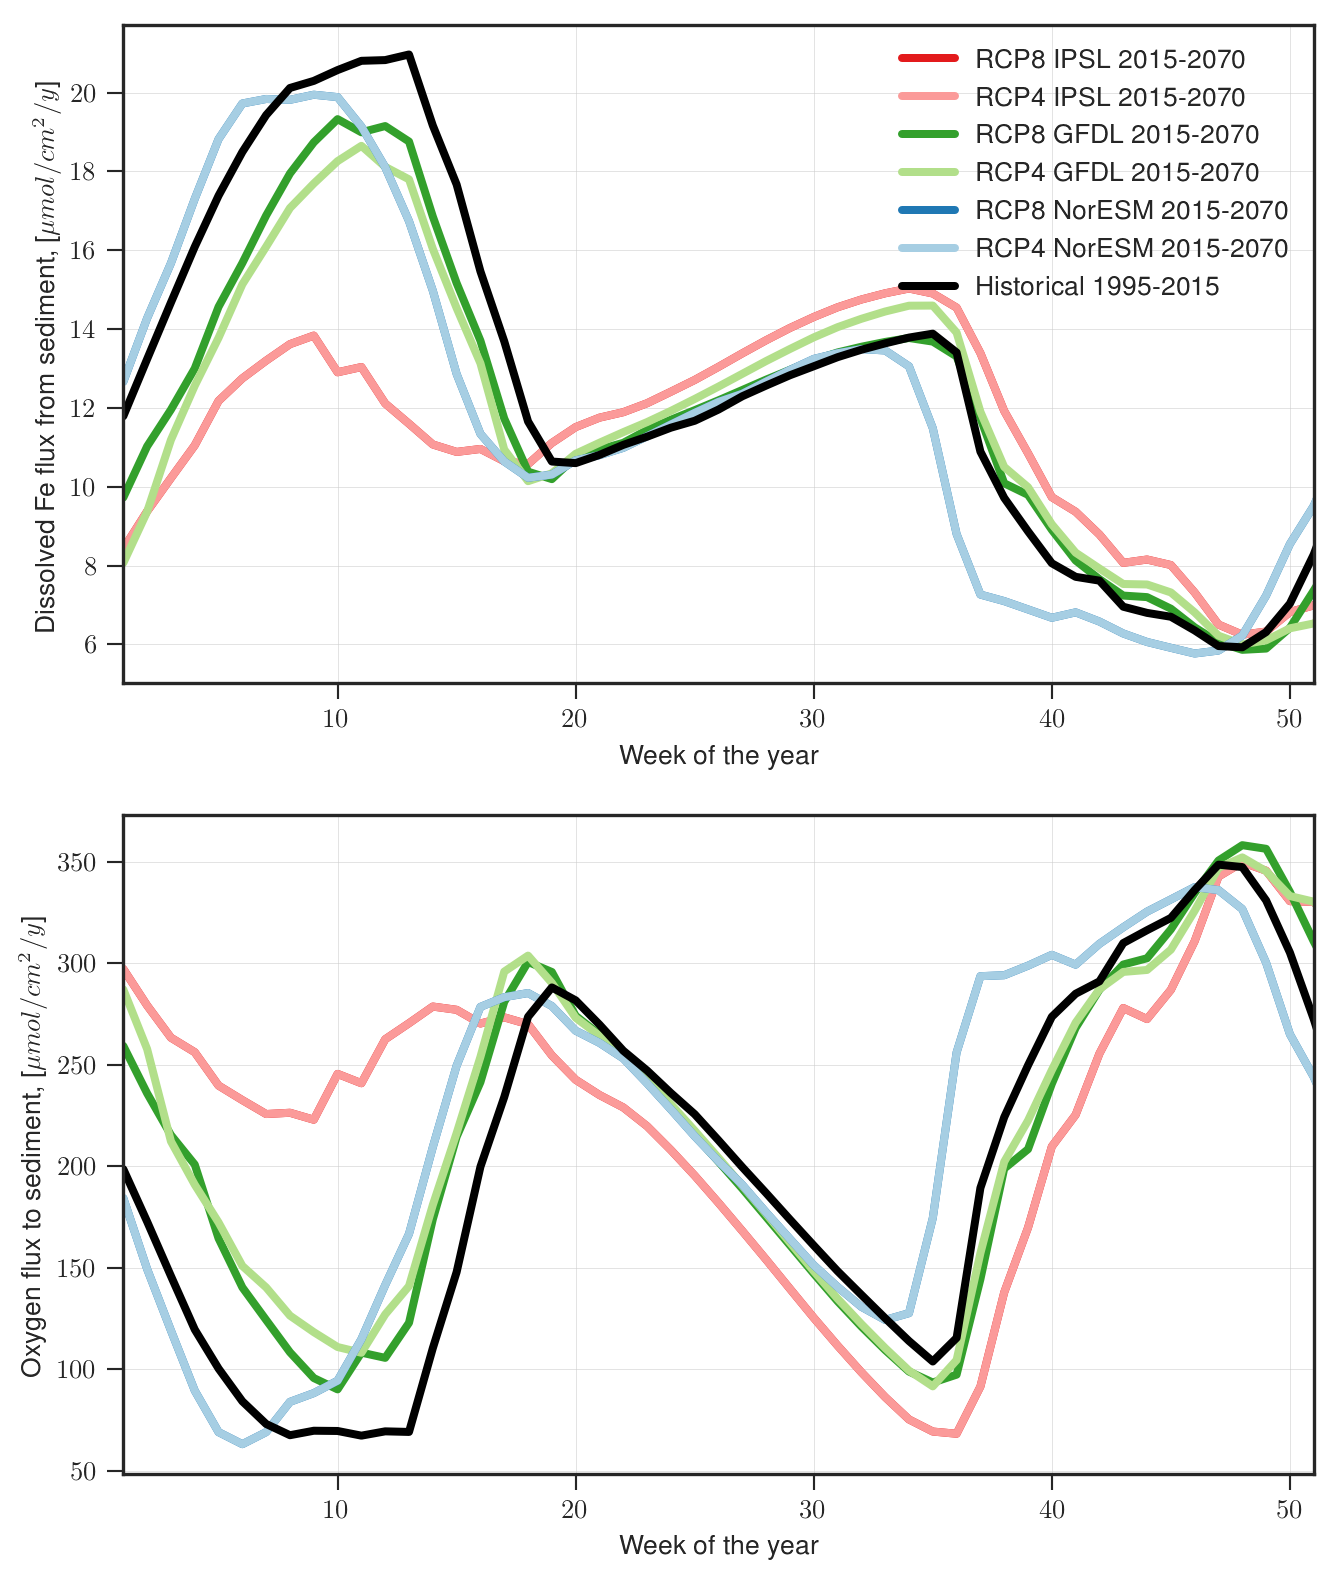

In [48]:
plt.figure(figsize=(8,10))
ax0 = plt.subplot(211)


# Phy[-365*55:].groupby(['WOY']).mean()[names_scen].plot(ax=ax1, lw=3)
Fe2_fx[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', ax=ax0, lw=3, color=clr_pltt)

# ax1.set_yticks(np.arange(0, 12, 1.0*2))
# ax0.set_yticks(np.arange(0, 0.36, 0.03*2))
ax0.set_ylabel('Dissolved Fe flux from sediment, [$\mu mol/cm^2/y$]')
ax0.set_xlabel('Week of the year')
# ax1.legend(frameon=1)
ax0.set_xlim(1,51)

ax2 = plt.subplot(212)
O2_fx[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', lw=3, ax=ax2, color=clr_pltt)
ax2.legend_.remove()
ax2.set_ylabel('Oxygen flux to sediment, [$\mu mol/cm^2/y$]')
ax2.set_xlabel('Week of the year')
# ax2.set_ylim(0.6, 0.9)
ax2.set_xlim(1,51)

ax0.grid(linestyle='-', linewidth=0.2)
ax1.grid(linestyle='-', linewidth=0.2)
ax2.grid(linestyle='-', linewidth=0.2)

# plt.xlim(1,53)
# plt.title('2040-2050 Mean Phy')

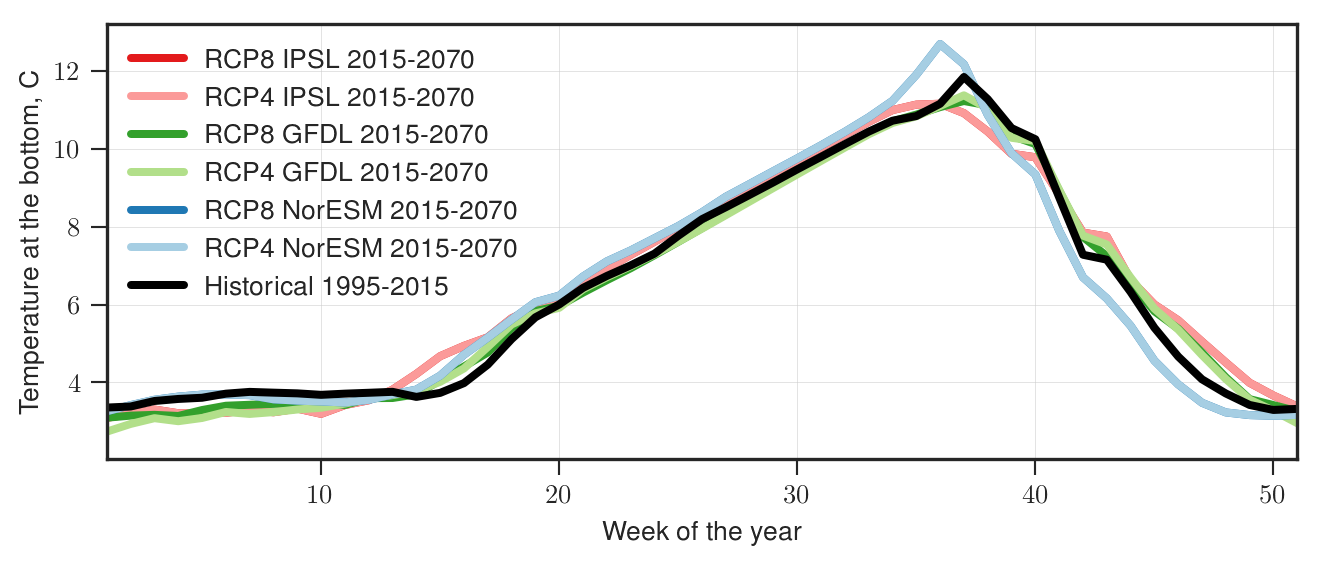

In [49]:
plt.figure(figsize=(8,3))
ax2 = plt.subplot(111)
Tsed[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', lw=3, ax=ax2, color=clr_pltt)
ax2.set_ylabel('Temperature at the bottom, C')
ax2.set_xlabel('Week of the year')
# ax2.set_ylim(0.6, 0.9)
ax2.set_xlim(1,51)

ax2.grid(linestyle='-', linewidth=0.2)




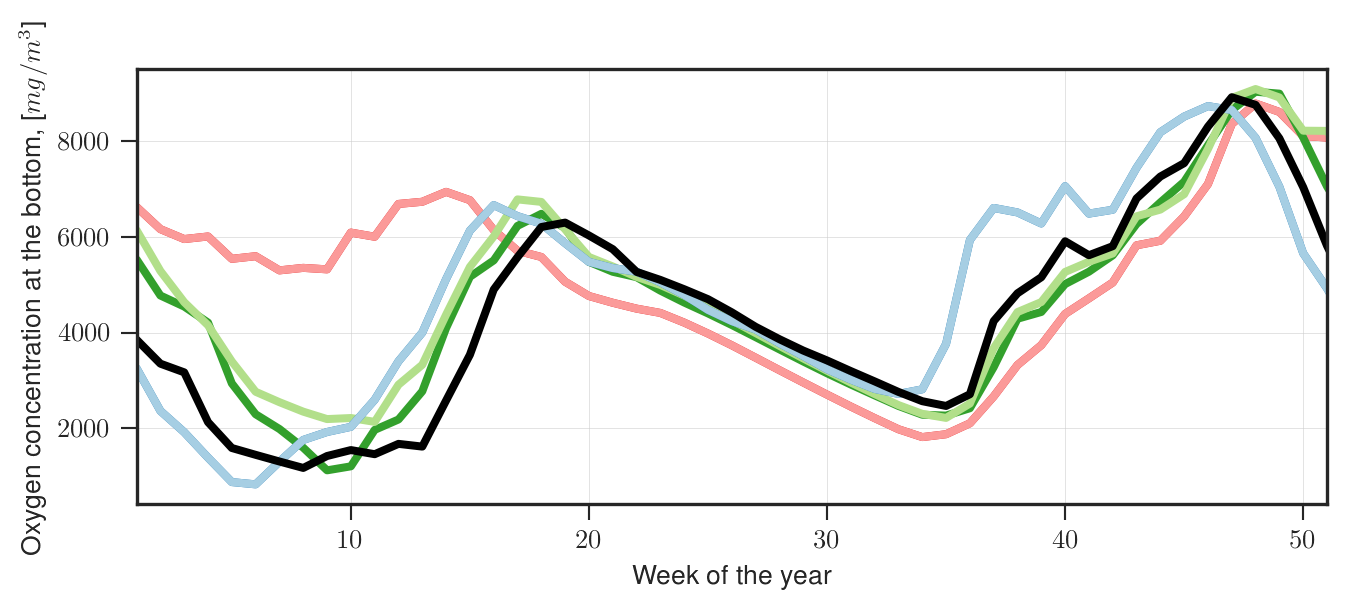

In [50]:
plt.figure(figsize=(8,3))
ax2 = plt.subplot(111)
Oxy[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', lw=3, ax=ax2, color=clr_pltt)
ax2.set_ylabel('Oxygen concentration at the bottom, [$mg/m^3$]')
ax2.set_xlabel('Week of the year')
# ax2.set_ylim(0.6, 0.9)
ax2.set_xlim(1,51)
ax2.legend_.remove()

ax2.grid(linestyle='-', linewidth=0.2)



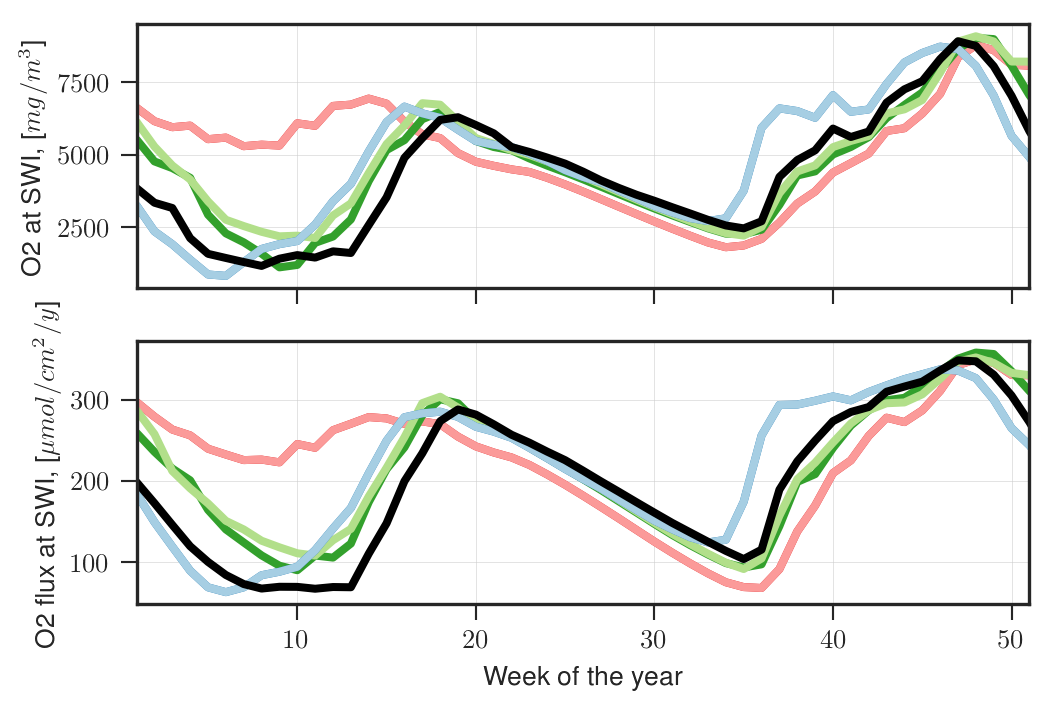

In [51]:
plt.figure(figsize=(8,5))
fig, (ax0, ax2) = plt.subplots(2,1, sharex=True)


# Phy[-365*55:].groupby(['WOY']).mean()[names_scen].plot(ax=ax1, lw=3)
Oxy[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', ax=ax0, lw=3, color=clr_pltt)

# ax1.set_yticks(np.arange(0, 12, 1.0*2))
# ax0.set_yticks(np.arange(0, 0.36, 0.03*2))
ax0.set_ylabel(r'O2 at SWI, [$mg/m^3$]')
ax0.set_xlabel('Week of the year')
# ax1.legend(frameon=1)
ax0.legend_.remove()
ax0.set_xlim(1,51)

ax2 = plt.subplot(212)
O2_fx[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', lw=3, ax=ax2, color=clr_pltt)
ax2.legend_.remove()
ax2.set_ylabel('O2 flux at SWI, [$\mu mol/cm^2/y$]')
ax2.set_xlabel('Week of the year')
# ax2.set_ylim(0.6, 0.9)
ax2.set_xlim(1,51)

ax0.grid(linestyle='-', linewidth=0.2)
ax1.grid(linestyle='-', linewidth=0.2)
ax2.grid(linestyle='-', linewidth=0.2)

# plt.xlim(1,53)
# plt.title('2040-2050 Mean Phy')

In [52]:
# algae 
Ice_bool.groupby(['DOY']).mean()[names_scen].idxmin().values
# phy_int_yearly

array([131, 131, 127, 123, 125, 125, 127])

In [53]:
Phy.groupby(['DOY']).mean()[names_scen].idxmax()

RCP8 IPSL 2015-2070      199
RCP4 IPSL 2015-2070      199
RCP8 GFDL 2015-2070      167
RCP4 GFDL 2015-2070      193
RCP8 NorESM 2015-2070    198
RCP4 NorESM 2015-2070    198
Historical 1995-2015     167
dtype: int64

In [54]:
from numpy import trapz

In [190]:
names_scen

['RCP8 IPSL 2015-2070',
 'RCP4 IPSL 2015-2070',
 'RCP8 GFDL 2015-2070',
 'RCP4 GFDL 2015-2070',
 'RCP8 NorESM 2015-2070',
 'RCP4 NorESM 2015-2070',
 'Historical 1995-2015']

In [58]:
last_years = 55
max_ice_h = Ice[-365*last_years:].groupby(['DOY']).mean()[names_scen].max().values
max_grow_DOY = Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmax().values
ice_break_up = Ice[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmin().values
phy_mass = 1
days_of_bloom_1mg = ((Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass)[::-1].idxmin() - (Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass).idxmin()).values
phy_may_sept_mean = Phy[-365*last_years:][(Phy.DOY>120) & (Phy.DOY<275)].groupby(['DOY']).mean()[names_scen].mean()

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [59]:
p_int_yearly = []
pui_int_yearly = [] #under ice cover
pni_int_yearly = [] #under ice cover
fe_fx_ui_int_yearly = [] #under ice cover
fe_fx_ni_int_yearly = [] #no ice cover
o_int_yearly = []
o_ui_int_yearly = []
o_ni_int_yearly = []
oxy_int_yearly = []
oxy_ui_int_yearly = []
oxy_ni_int_yearly = []
ice_int_yearly = []
ice_bool_int_yearly = []
phy_int_yearly = []
av_T = []
fe_int_yearly = []
Kz_av = []

for scen in names_scen:
    ice_days = Ice_bool[scen].mean()*365
    ice_bool_int_yearly.append(ice_days)
    p_int_yearly.append(P_fx[scen].mean())
    pui_int_yearly.append(P_fx[Ice_bool[scen]>0][scen].mean())
    pni_int_yearly.append(P_fx[Ice_bool[scen]==0][scen].mean())
    fe_fx_ui_int_yearly.append(Fe2_fx[Ice_bool[scen]>0][scen].mean())
    fe_fx_ni_int_yearly.append(Fe2_fx[Ice_bool[scen]==0][scen].mean())
    fe_int_yearly.append(Fe2_fx[scen].mean())
    o_int_yearly.append(O2_fx[scen].mean())
    o_ui_int_yearly.append(O2_fx[Ice_bool[scen]==0][scen].mean())
    o_ni_int_yearly.append(O2_fx[Ice_bool[scen]>0][scen].mean())
    oxy_int_yearly.append(Oxy[scen].mean())
    oxy_ui_int_yearly.append(Oxy[Ice_bool[scen]==0][scen].mean())
    oxy_ni_int_yearly.append(Oxy[Ice_bool[scen]>0][scen].mean())
    ice_int_yearly.append(Ice[scen].mean())
    av_T.append(Tair[scen].mean())
    phy_int_yearly.append(Phy[scen].mean())
    Kz_av.append(Kz_mean.mean()[scen]) 

In [60]:
lrs = pd.DataFrame({'Scenarios':names_scen, 
                    'ice thickness':ice_int_yearly, 
                    'ice days':ice_bool_int_yearly, 
                    'phy':phy_int_yearly, 
                    'P flux':p_int_yearly, 
                    'T air':av_T, 
                    'o2 flux':o_int_yearly, 
                    'o2 flux under ice':o_ui_int_yearly, 
                    'o2 flux no ice':o_ni_int_yearly,  
                    'o2 C at SWI':oxy_int_yearly, 
                    'o2 C at SWI under ice':oxy_ui_int_yearly, 
                    'o2 C at SWI no ice':oxy_ni_int_yearly,  
                    'P flux under ice':pui_int_yearly,
                    'P flux no ice':pni_int_yearly,
                    'Fe2 flux under ice':fe_fx_ui_int_yearly,
                    'Fe2 flux no ice':fe_fx_ni_int_yearly,
                    'Kz average':Kz_av,
                    'max ice thickness':max_ice_h,
                    'max grow DOY':max_grow_DOY,
                    'ice break up day':ice_break_up,
                    'Fe2 flux':fe_int_yearly})

In [61]:
lrs

Fe2 flux  Fe2 flux no ice  Fe2 flux under ice  Kz average    P flux  \
0  11.141946        10.059272           18.709670    2.066955 -0.138697   
1  11.141946        10.059272           18.709670    2.066955 -0.138697   
2  11.797789         9.824353           18.582145    1.850627 -0.131881   
3  11.712912        10.167670           17.433507    1.885301 -0.132115   
4  11.818913         9.543767           18.031060    1.798999 -0.122429   
5  11.818913         9.543767           18.031060    1.798999 -0.122429   
6  12.464529        10.003403           18.503889    1.712249 -0.135438   

   P flux no ice  P flux under ice              Scenarios     T air  \
0      -0.147704         -0.075741    RCP8 IPSL 2015-2070  9.965969   
1      -0.147704         -0.075741    RCP4 IPSL 2015-2070  9.965969   
2      -0.147912         -0.076770    RCP8 GFDL 2015-2070  8.291090   
3      -0.148141         -0.072785    RCP4 GFDL 2015-2070  8.338967   
4      -0.135727         -0.086119  RCP8 NorESM 2015-2070  6.904674   
5      -0.135727         -0.086119  RCP4 NorESM 2015-2070  6.904674   
6      -0.150873         -0.097561   Historical 1995-2015  6.859734   

   ice break up day    ice days  ice thickness  max grow DOY  \
0               131   45.682996       0.025497           199   
1               131   45.682996       0.025497           199   
2               127   82.247238       0.040647           167   
3               123   77.625403       0.039510           193   
4               125   97.843698       0.051166           198   
5               125   97.843698       0.051166           198   
6               127  105.677618       0.078489           167   

   max ice thickness  o2 C at SWI  o2 C at SWI no ice  o2 C at SWI under ice  \
0           0.110292  5146.538447         1663.767524            5644.800075   
1           0.110292  5146.538447         1663.767524            5644.800075   
2           0.186778  4587.799040         1118.126479            5597.058796   
3           0.177017  4844.212589         1492.761112            5749.504065   
4           0.195087  4721.854445         1310.443680            5971.254300   
5           0.195087  4721.854445         1310.443680            5971.254300   
6           0.312323  4406.893573         1371.199545            5643.982758   

      o2 flux  o2 flux no ice  o2 flux under ice       phy  
0  224.528670      101.031258         242.196792  3.612307  
1  224.528670      101.031258         242.196792  3.612307  
2  212.272521       85.905474         249.030219  3.403525  
3  217.013787       92.618423         250.615367  3.403276  
4  212.638339       86.728832         258.751613  3.285403  
5  212.638339       86.728832         258.751613  3.285403  
6  199.162585       79.403667         247.966074  3.328503

In [62]:
lrs.corr()

Fe2 flux  Fe2 flux no ice  Fe2 flux under ice  \
Fe2 flux               1.000000        -0.268504           -0.269038   
Fe2 flux no ice       -0.268504         1.000000            0.121766   
Fe2 flux under ice    -0.269038         0.121766            1.000000   
Kz average            -0.961176         0.496082            0.385498   
P flux                 0.379316        -0.883738           -0.570296   
P flux no ice          0.023639        -0.897100           -0.360649   
P flux under ice      -0.798886         0.402828           -0.091479   
T air                 -0.873498         0.650610            0.451617   
ice break up day      -0.597736         0.347910            0.898980   
ice days               0.924424        -0.579181           -0.425450   
ice thickness          0.967119        -0.297197           -0.172541   
max grow DOY          -0.682593        -0.121821           -0.254137   
max ice thickness      0.987479        -0.194319           -0.172726   
o2 C at SWI           -0.965828         0.363017            0.188113   
o2 C at SWI no ice    -0.663579         0.627191            0.175645   
o2 C at SWI under ice  0.168681        -0.776964           -0.590716   
o2 flux               -0.989870         0.284602            0.133304   
o2 flux no ice        -0.967051         0.464878            0.226654   
o2 flux under ice      0.489581        -0.830688           -0.633504   
phy                   -0.826791         0.668630            0.550995   

                       Kz average    P flux  P flux no ice  P flux under ice  \
Fe2 flux                -0.961176  0.379316       0.023639         -0.798886   
Fe2 flux no ice          0.496082 -0.883738      -0.897100          0.402828   
Fe2 flux under ice       0.385498 -0.570296      -0.360649         -0.091479   
Kz average               1.000000 -0.618571      -0.282554          0.762468   
P flux                  -0.618571  1.000000       0.895935         -0.304432   
P flux no ice           -0.282554  0.895935       1.000000         -0.190524   
P flux under ice         0.762468 -0.304432      -0.190524          1.000000   
T air                    0.967221 -0.769175      -0.504737          0.761163   
ice break up day         0.718112 -0.724771      -0.398798          0.183914   
ice days                -0.992892  0.702754       0.393464         -0.753813   
ice thickness           -0.920765  0.351405       0.077341         -0.919201   
max grow DOY             0.541302  0.180483       0.518029          0.399495   
max ice thickness       -0.916677  0.271219      -0.052672         -0.853422   
o2 C at SWI              0.952378 -0.423528      -0.050978          0.716216   
o2 C at SWI no ice       0.768105 -0.632001      -0.317145          0.359251   
o2 C at SWI under ice   -0.401498  0.905573       0.945033         -0.269089   
o2 flux                  0.939123 -0.329072      -0.000936          0.849256   
o2 flux no ice           0.980800 -0.522459      -0.177971          0.768426   
o2 flux under ice       -0.706859  0.988759       0.839517         -0.380147   
phy                      0.947895 -0.831268      -0.542653          0.631862   

                          T air  ice break up day  ice days  ice thickness  \
Fe2 flux              -0.873498         -0.597736  0.924424       0.967119   
Fe2 flux no ice        0.650610          0.347910 -0.579181      -0.297197   
Fe2 flux under ice     0.451617          0.898980 -0.425450      -0.172541   
Kz average             0.967221          0.718112 -0.992892      -0.920765   
P flux                -0.769175         -0.724771  0.702754       0.351405   
P flux no ice         -0.504737         -0.398798  0.393464       0.077341   
P flux under ice       0.761163          0.183914 -0.753813      -0.919201   
T air                  1.000000          0.741794 -0.989862      -0.865598   
ice break up day       0.741794          1.000000 -0.743660      -0.473574   
ice days              -0.989862         -0.743660

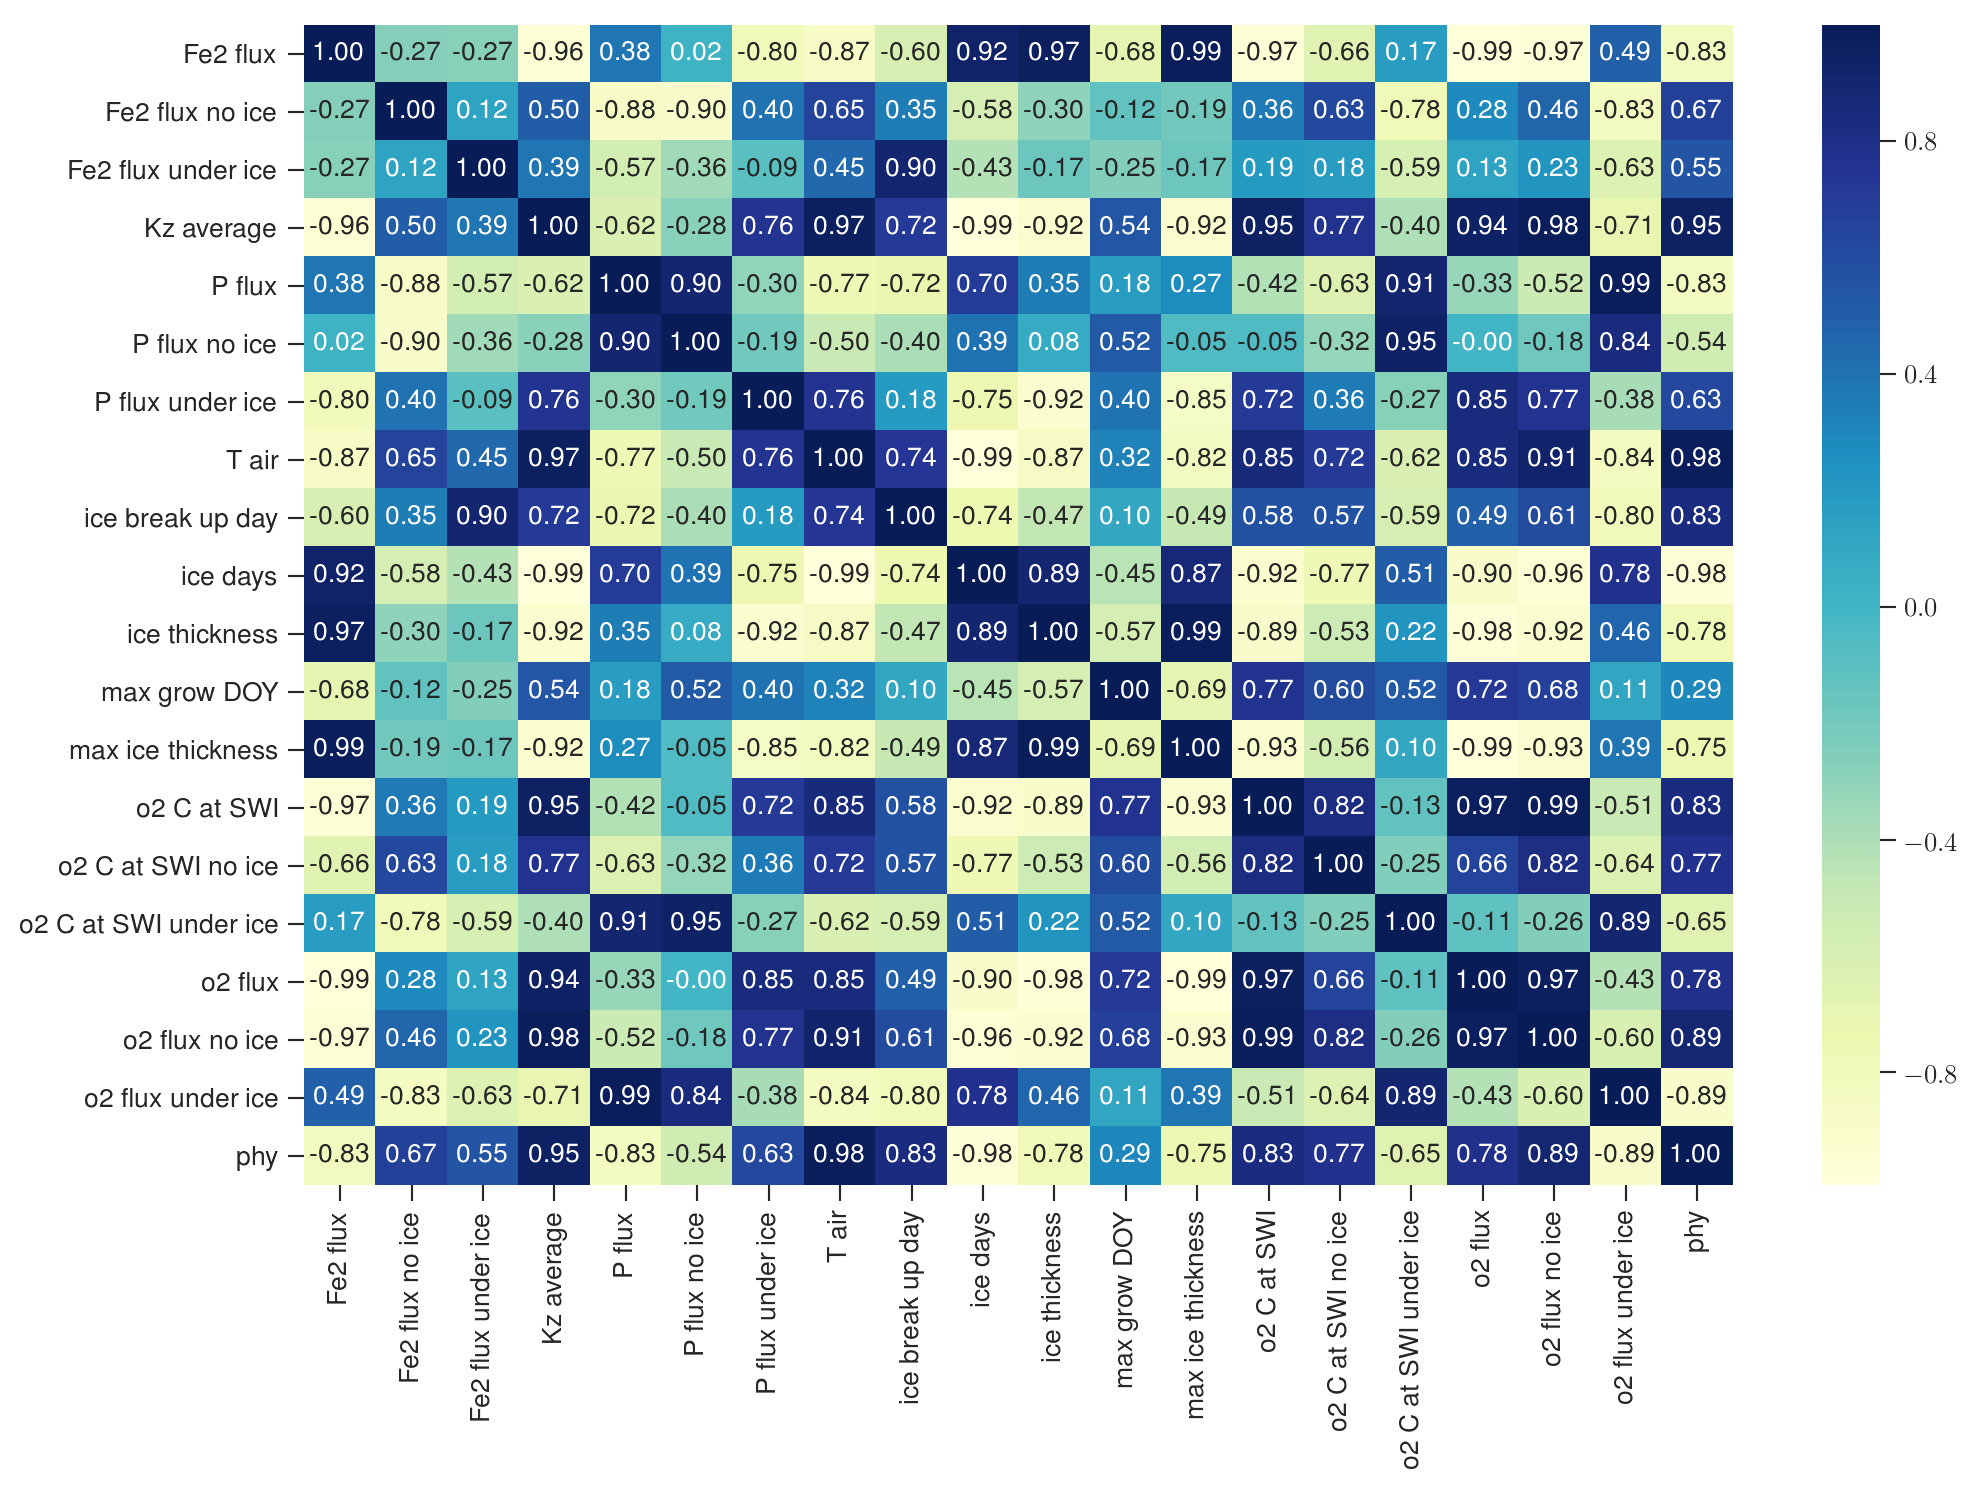

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(lrs.corr(), xticklabels=lrs.corr().columns, yticklabels=lrs.corr().columns, center=0,  annot=True, fmt='.2f', cmap="YlGnBu")

In [64]:
from scipy.stats import linregress
linregress(ice_bool_int_yearly, np.array(phy_int_yearly))

LinregressResult(slope=-0.005571144451468376, intercept=3.85848000283133, rvalue=-0.9758401823454992, pvalue=0.00017200604378125092, stderr=0.0005578320368735223)

Text(0,0.5,'Phytoplankton yearly average, mg/m3')

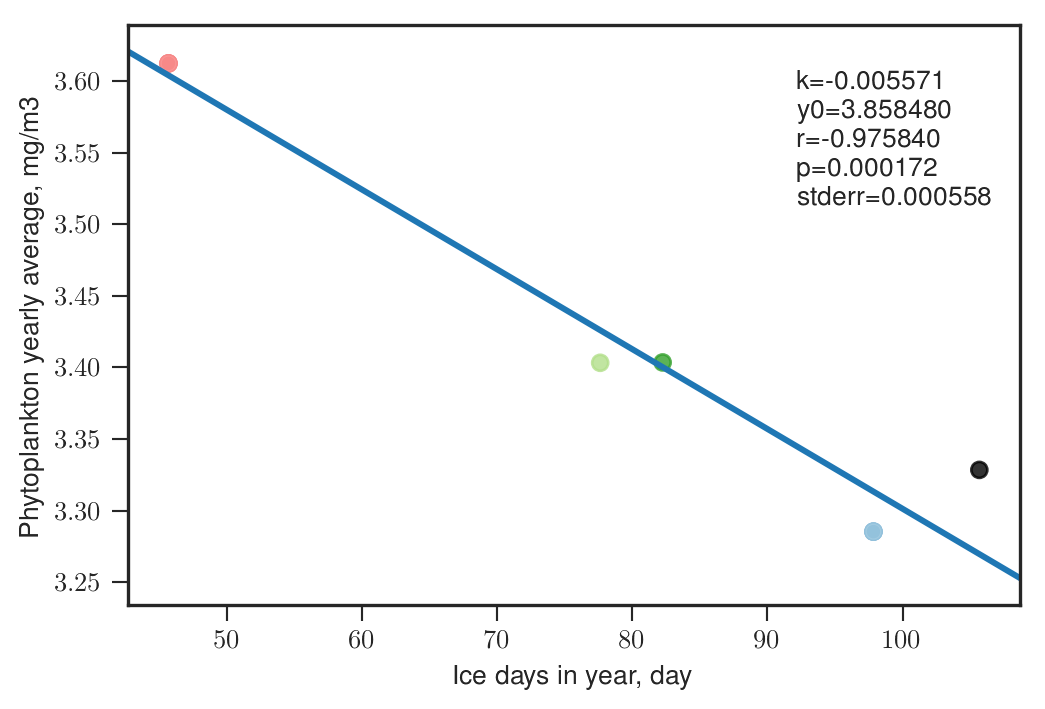

In [66]:
# plt.scatter(ice_bool_int_yearly, np.array(phy_int_yearly))
x,y = np.array(ice_bool_int_yearly), np.array(phy_int_yearly)
ax = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(np.array(ice_bool_int_yearly), np.array(phy_int_yearly))
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Ice days in year, day')
plt.ylabel('Phytoplankton yearly average, mg/m3')

Text(0.5,0,'Yearly average air temperature, C')

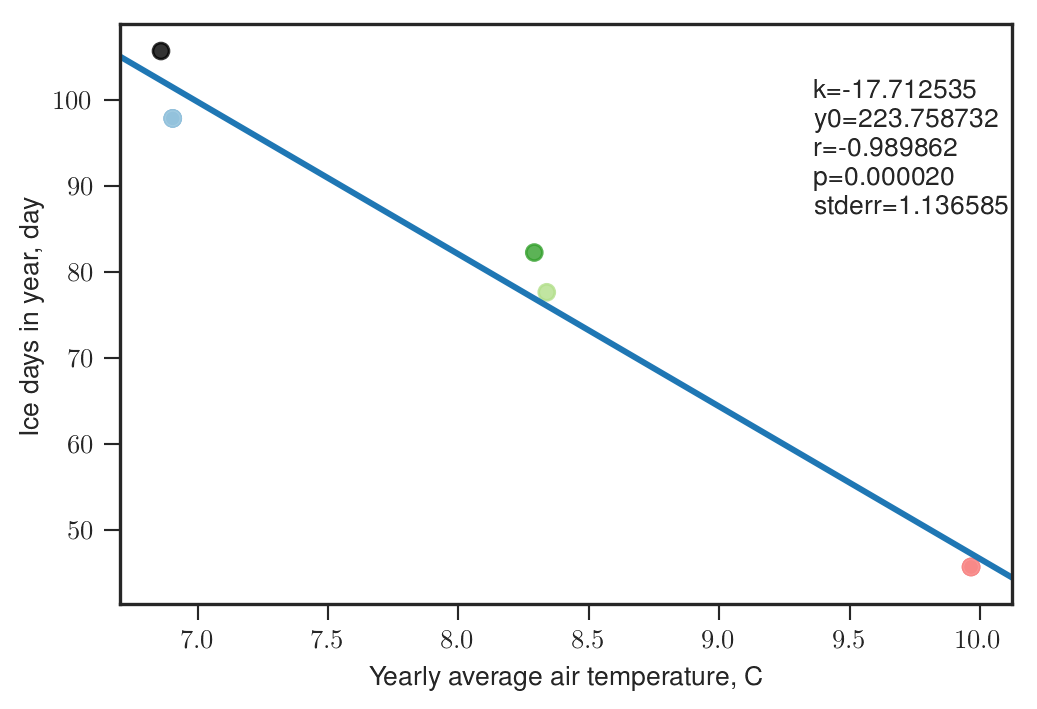

In [67]:
x, y=np.array(av_T), np.array(ice_bool_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(np.array(av_T), np.array(ice_bool_int_yearly))
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Ice days in year, day')
plt.xlabel('Yearly average air temperature, C')

Text(0,0.5,'Average P flux from sediment, umol/sq cm/ year')

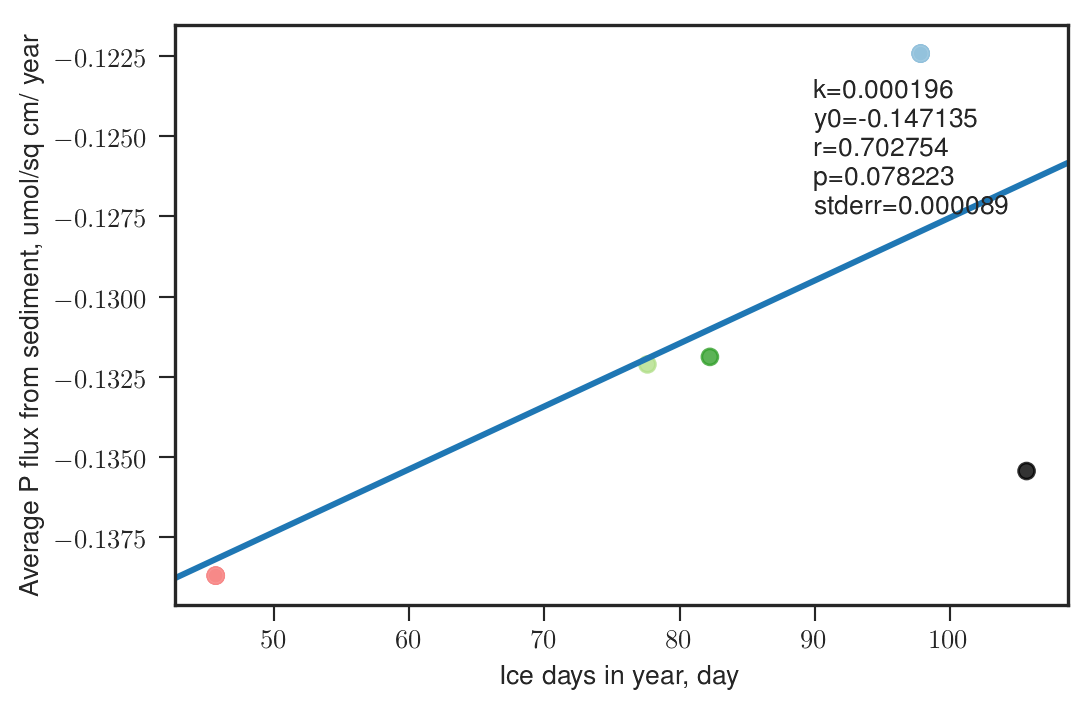

In [68]:
y, x = np.array(p_int_yearly), np.array(ice_bool_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Ice days in year, day')
plt.ylabel('Average P flux from sediment, umol/sq cm/ year')


Text(0.5,0,'Air Temperature, C')

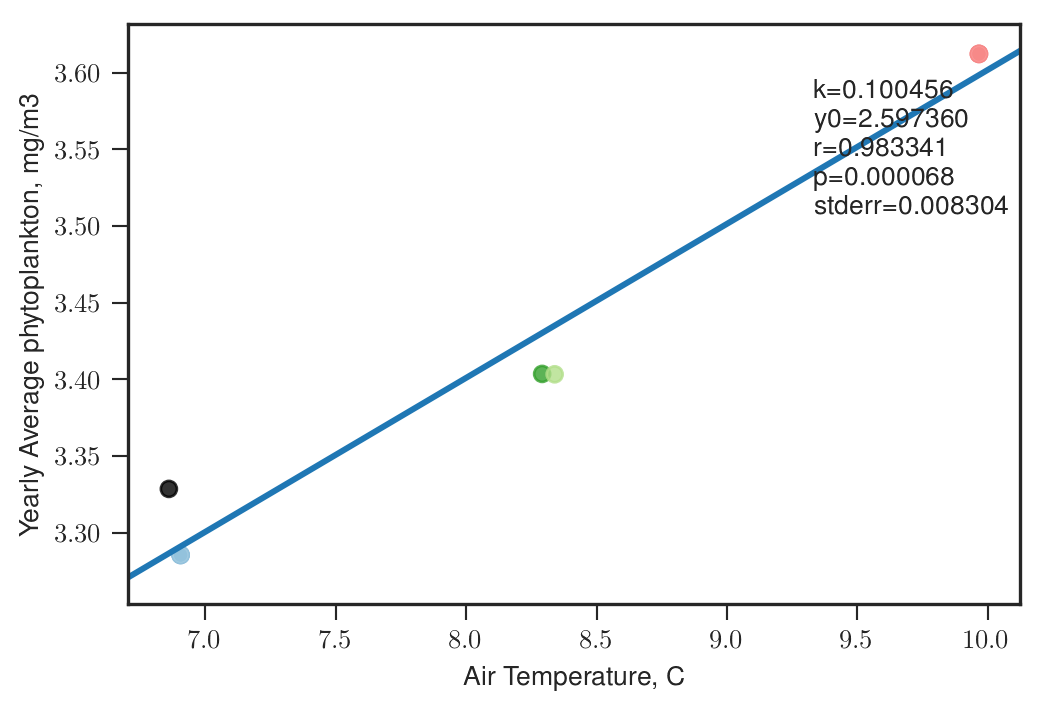

In [69]:
y, x = np.array(phy_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Yearly Average phytoplankton, mg/m3')
plt.xlabel('Air Temperature, C')



Text(0.5,0,'DIP flux during no ice periods, [$umol/cm^2/year$]')

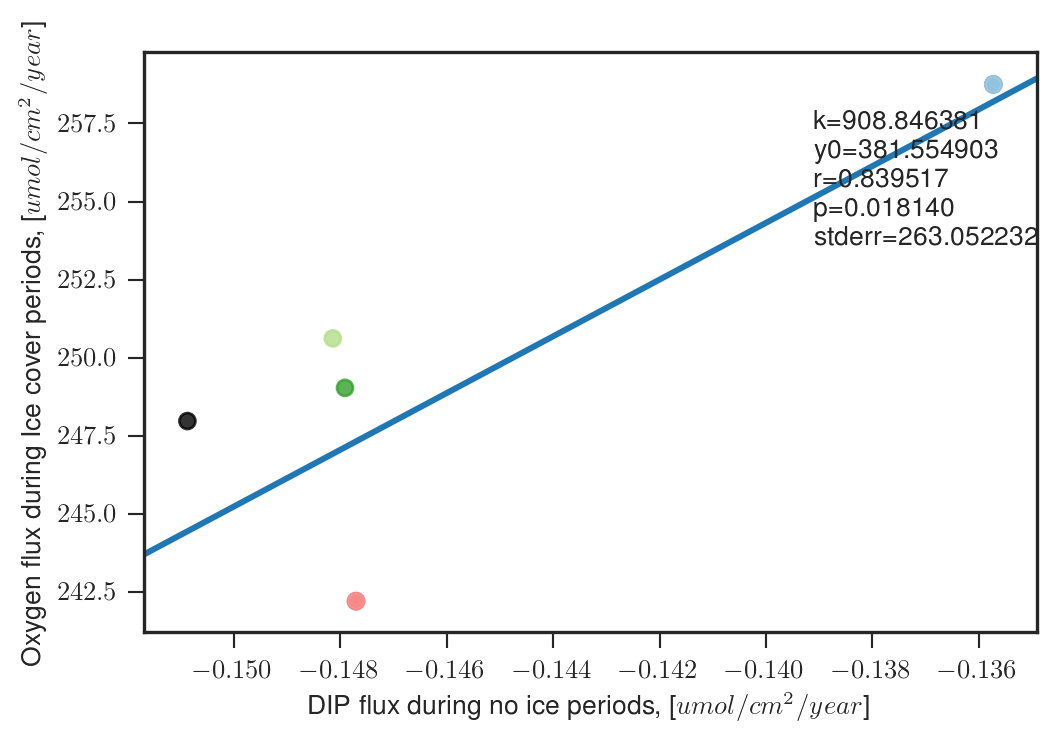

In [70]:
y, x = np.array(o_ui_int_yearly), np.array(pni_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Oxygen flux during Ice cover periods, [$umol/cm^2/year$]')
plt.xlabel('DIP flux during no ice periods, [$umol/cm^2/year$]')

Text(0.5,0,'DIP flux, [$umol/cm^2/year$]')

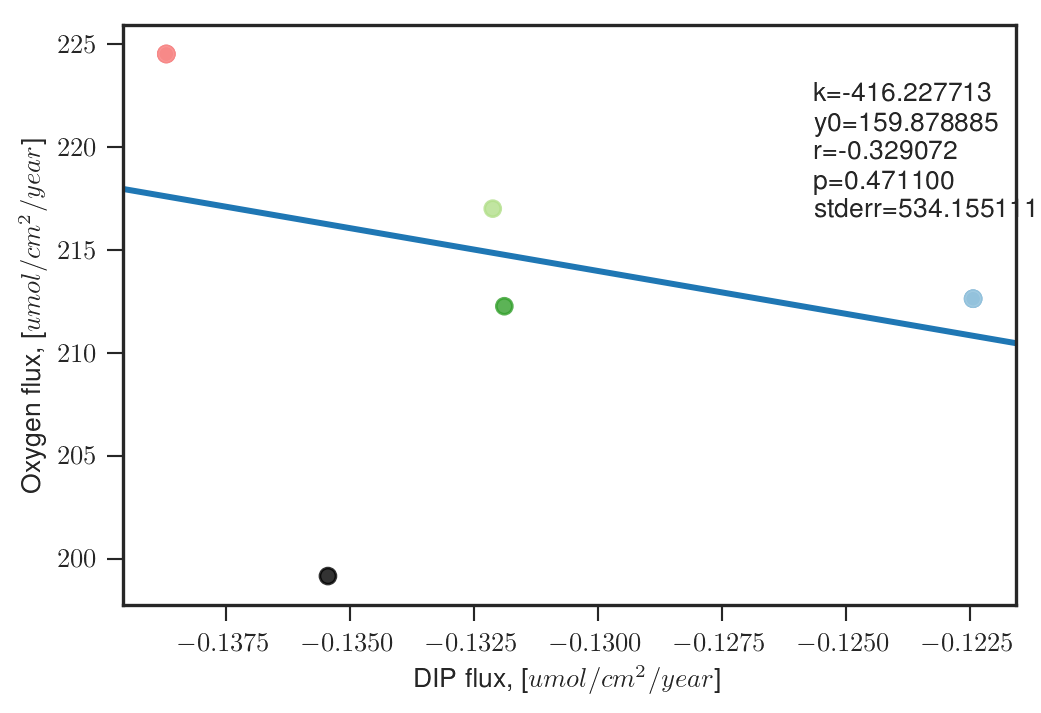

In [71]:
y, x = np.array(o_int_yearly), np.array(p_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Oxygen flux, [$umol/cm^2/year$]')
plt.xlabel('DIP flux, [$umol/cm^2/year$]')

Text(0.5,0,'Kz')

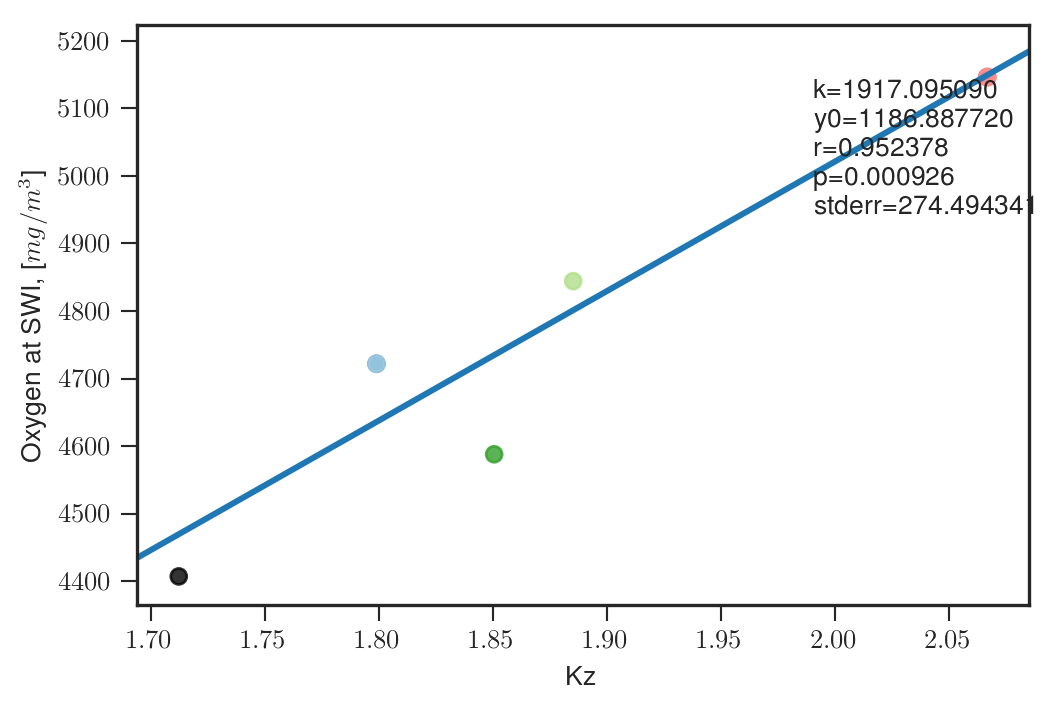

In [72]:
y, x = np.array(oxy_int_yearly), np.array(Kz_av)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Oxygen at SWI, [$mg/m^3$]')
plt.xlabel('Kz')

In [73]:
clr_pltt = sns.color_palette("Paired", 6)[::-1] + [(0,0,0)]

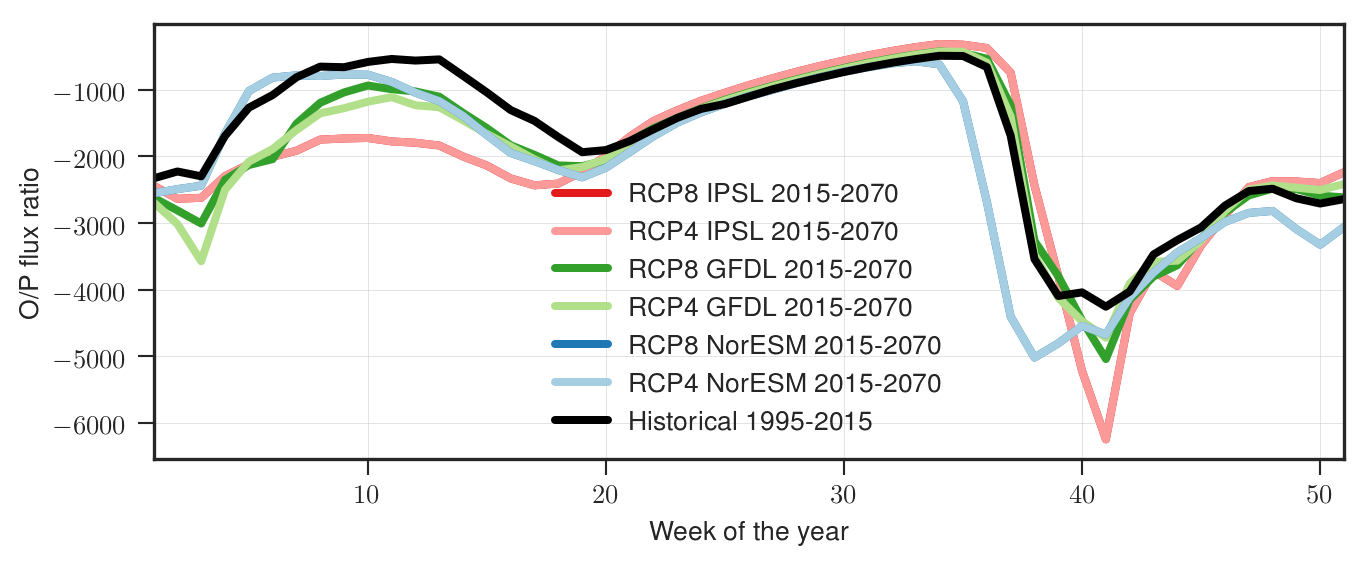

In [74]:
plt.figure(figsize=(8,3))
ax2 = plt.subplot(111)
(O2_fx.groupby(['WOY']).mean()[names_scen]/P_fx.groupby(['WOY']).mean()[names_scen]).plot(linestyle='-', lw=3, ax=ax2, color=sns.color_palette("Paired", 6)[::-1] + [(0,0,0)])
ax2.set_ylabel('O/P flux ratio')
ax2.set_xlabel('Week of the year')
# ax2.set_ylim(0.6, 0.9)
ax2.set_xlim(1,51)

ax2.grid(linestyle='-', linewidth=0.2)





Text(0.5,0,'Oxygen at SWI, [$mg/m^3$]')

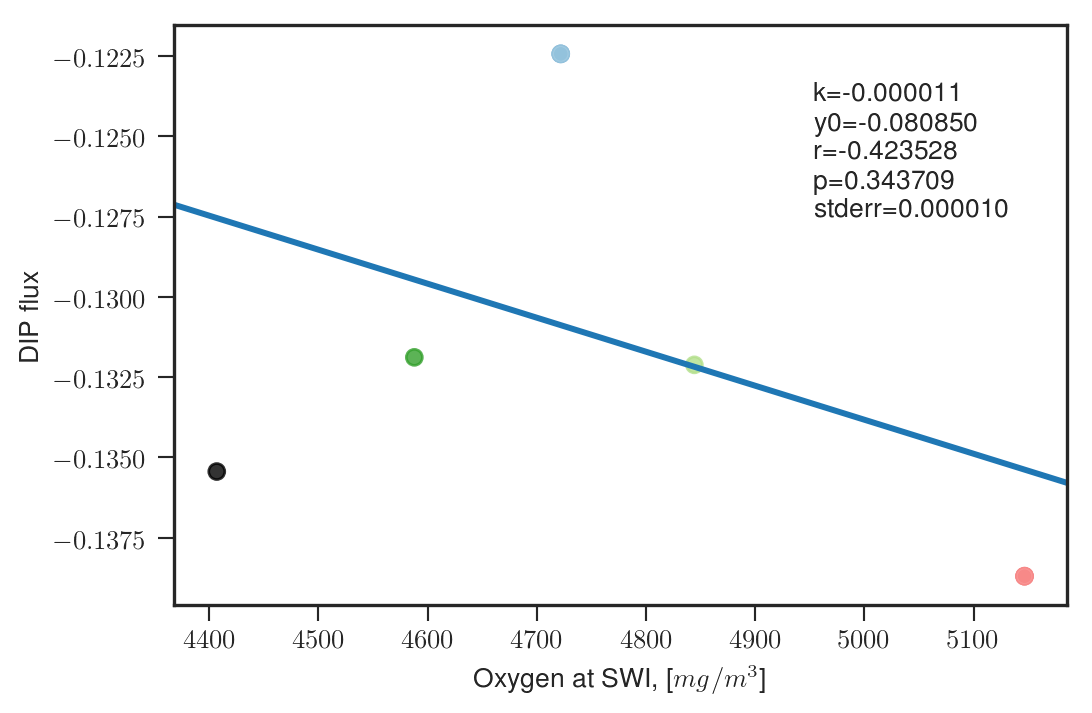

In [75]:
y, x = np.array(p_int_yearly), np.array(oxy_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)

plt.ylabel('DIP flux')
plt.xlabel('Oxygen at SWI, [$mg/m^3$]')


Text(0.5,0,'Oxygen no ice at SWI, [$mg/m^3$]')

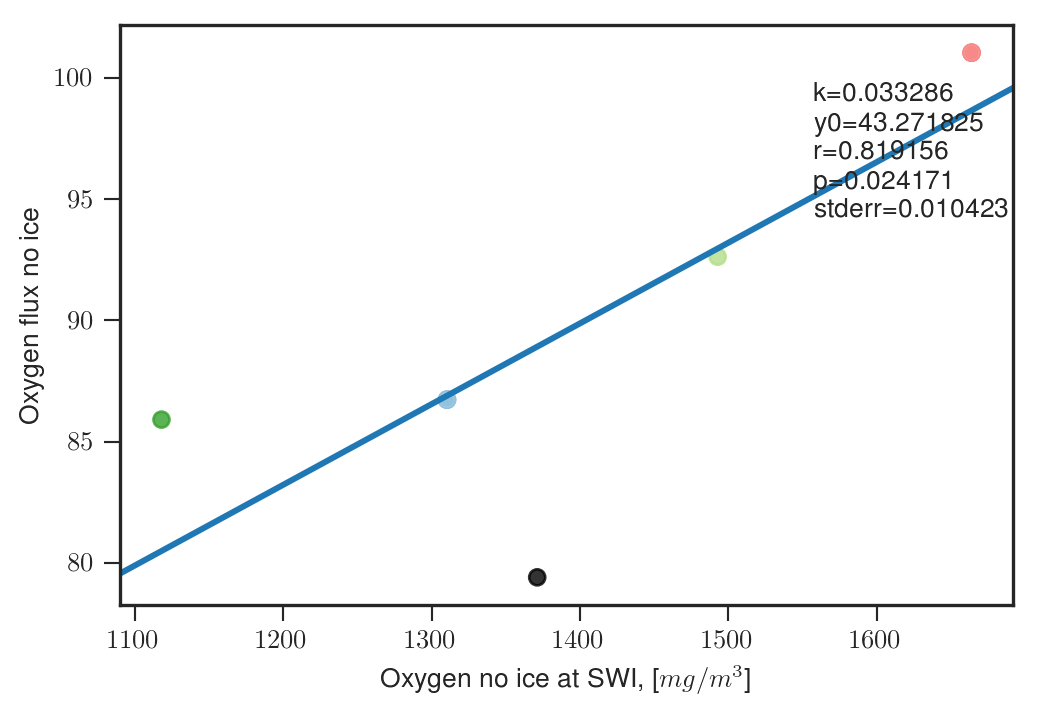

In [76]:
y, x = np.array(o_ni_int_yearly), np.array(oxy_ni_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)

plt.ylabel('Oxygen flux no ice')
plt.xlabel('Oxygen no ice at SWI, [$mg/m^3$]')

In [77]:
pivot = 'WOY'
last_years = 55

tair_grouped = Tair[-365*last_years:].groupby([pivot]).mean()[names_scen]
tw_grouped = Tw_mean[-365*last_years:].groupby([pivot]).mean()[names_scen]
tw_4m_grouped = Tw_4m[-365*last_years:].groupby([pivot]).mean()[names_scen]
ice_grouped = Ice[-365*last_years:].groupby([pivot]).mean()[names_scen]
phy_grouped = Phy[-365*last_years:].groupby([pivot]).mean()[names_scen]
pfx_grouped = P_fx[-365*last_years:].groupby([pivot]).mean()[names_scen]
fe2fx_grouped = Fe2_fx[-365*last_years:].groupby([pivot]).mean()[names_scen]
o2fx_grouped = O2_fx[-365*last_years:].groupby([pivot]).mean()[names_scen]
kz_grouped = Kz_mean[-365*last_years:].groupby([pivot]).mean()[names_scen]

for data in [tw_4m_grouped, tair_grouped, ice_grouped, phy_grouped, pfx_grouped, fe2fx_grouped, o2fx_grouped, tw_grouped, kz_grouped]:
    for s in names_scen:
        data[s] = (data[s] - data['Historical 1995-2015'])
        
for data in []:
    for s in names_scen:
        data[s] = (data[s] - data['Historical 1995-2015']) / data['Historical 1995-2015']

In [78]:
fx_convert =  365 * 10**2

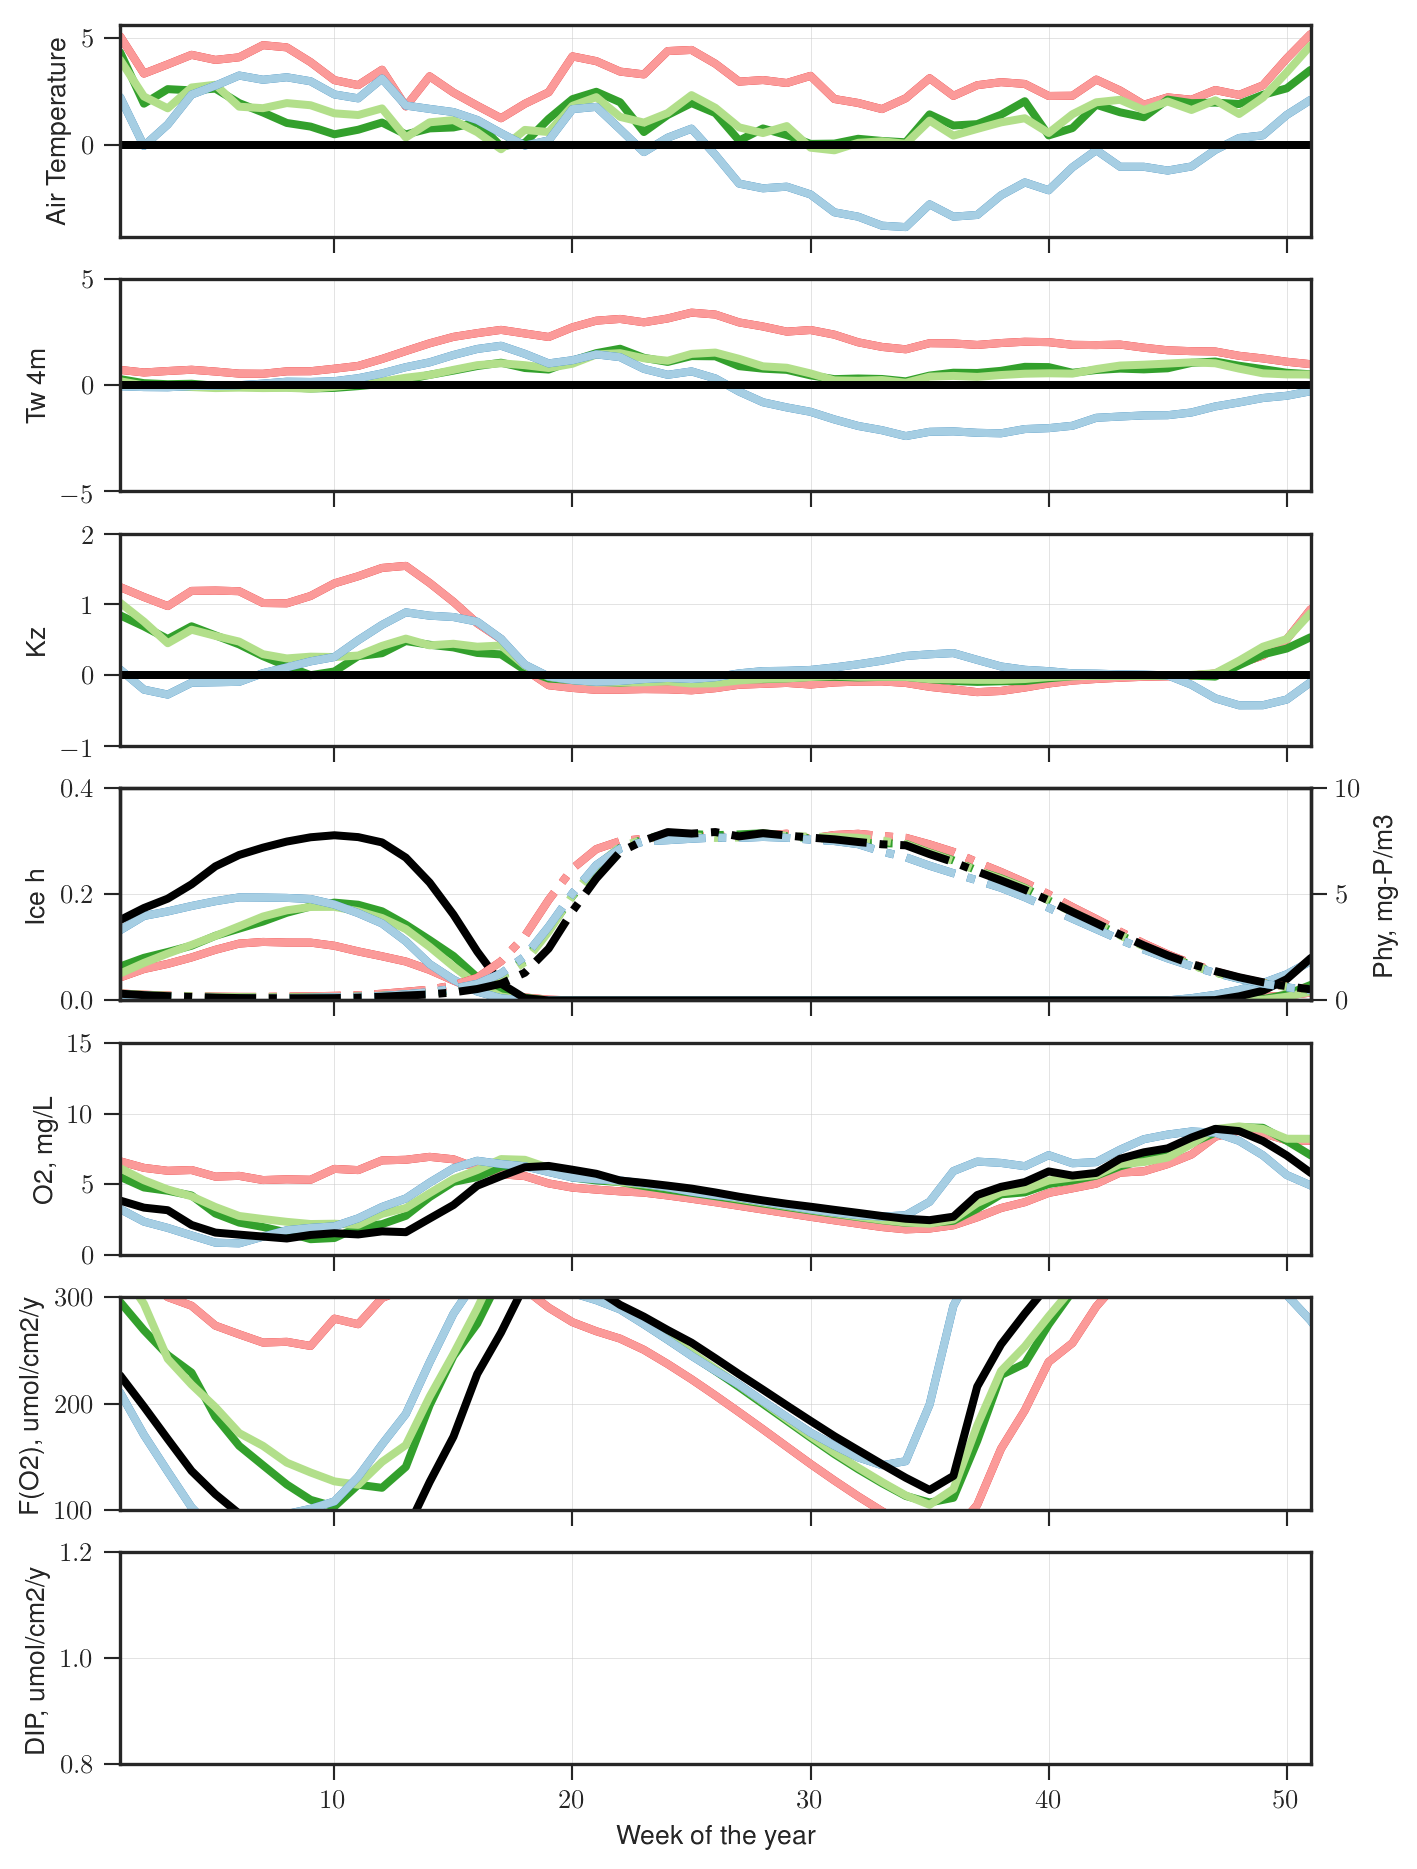

In [79]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7,1, sharex=True, figsize=(8,12))


# Phy[-365*55:].groupby(['WOY']).mean()[names_scen].plot(ax=ax1, lw=3)
tair_grouped.plot(linestyle='-', ax=ax1, lw=3, color=clr_pltt)

# ax1.set_yticks(np.arange(0, 12, 1.0*2))
# ax0.set_yticks(np.arange(0, 0.36, 0.03*2))
ax1.set_ylabel(r'Air Temperature')
ax1.set_xlabel('Week of the year')
# ax1.legend(frameon=1)
ax1.legend_.remove()
ax1.set_xlim(1,51)


tw_4m_grouped.plot(linestyle='-', ax=ax2, lw=3, color=clr_pltt)
ax2.legend_.remove()
ax2.set_ylabel('Tw 4m')
ax2.set_xlabel('Week of the year')
# ax2.set_ylim(0.6, 0.9)
ax2.set_xlim(1,51)
ax2.set_ylim(-5,5)


kz_grouped.plot(linestyle='-', ax=ax3, lw=3, color=clr_pltt)
ax3.legend_.remove()
ax3.set_ylabel('Kz')
ax3.set_xlabel('Week of the year')
ax3.set_xlim(1,51)
ax3.set_ylim(-1,2)


Ice[-365*last_years:].groupby([pivot]).mean()[names_scen].plot(linestyle='-', ax=ax4, lw=3, color=clr_pltt)
ax4.legend_.remove()
ax4.set_ylabel('Ice h')
ax4.set_xlabel('Week of the year')
# ax2.set_ylim(0.6, 0.9)
ax4.set_xlim(1,51)
ax4.set_ylim(0,0.4)


ax42 = ax4.twinx()
Phy[-365*last_years:].groupby([pivot]).mean()[names_scen].plot(linestyle='-.', ax=ax42, lw=3, color=clr_pltt)
ax42.legend_.remove()
ax42.set_ylim(0,10)
ax42.set_ylabel('Phy, mg-P/m3')




(1/1000*Oxy[-365*last_years:].groupby([pivot]).mean()[names_scen]).plot(linestyle='-', ax=ax5, lw=3, color=clr_pltt)
ax5.legend_.remove()
ax5.set_ylabel('O2, mg/L')
ax5.set_xlabel('Week of the year')
ax5.set_xlim(1,51)
ax5.set_ylim(0,15)

(1/32000*fx_convert*O2_fx[-365*last_years:].groupby([pivot]).mean()[names_scen]).plot(linestyle='-', ax=ax6, lw=3, color=clr_pltt)
ax6.legend_.remove()
ax6.set_ylabel('F(O2), umol/cm2/y')
ax6.set_xlabel('Week of the year')
ax6.set_xlim(1,51)
ax6.set_ylim(100,300)


(1/30000*fx_convert*P_fx.groupby(['WOY']).mean()[names_scen]).groupby([pivot]).mean()[names_scen].plot(linestyle='-', ax=ax7, lw=3, color=clr_pltt)
ax7.legend_.remove()
ax7.set_ylabel('DIP, umol/cm2/y')
ax7.set_xlabel('Week of the year')
ax7.set_xlim(1,51)
ax7.set_ylim(0.8,1.2)

ax1.grid(linestyle='-', linewidth=0.2)
ax2.grid(linestyle='-', linewidth=0.2)
ax3.grid(linestyle='-', linewidth=0.2)
ax4.grid(linestyle='-', linewidth=0.2)
ax5.grid(linestyle='-', linewidth=0.2)
ax6.grid(linestyle='-', linewidth=0.2)
ax7.grid(linestyle='-', linewidth=0.2)

# plt.xlim(1,53)
# plt.title('2040-2050 Mean Phy')

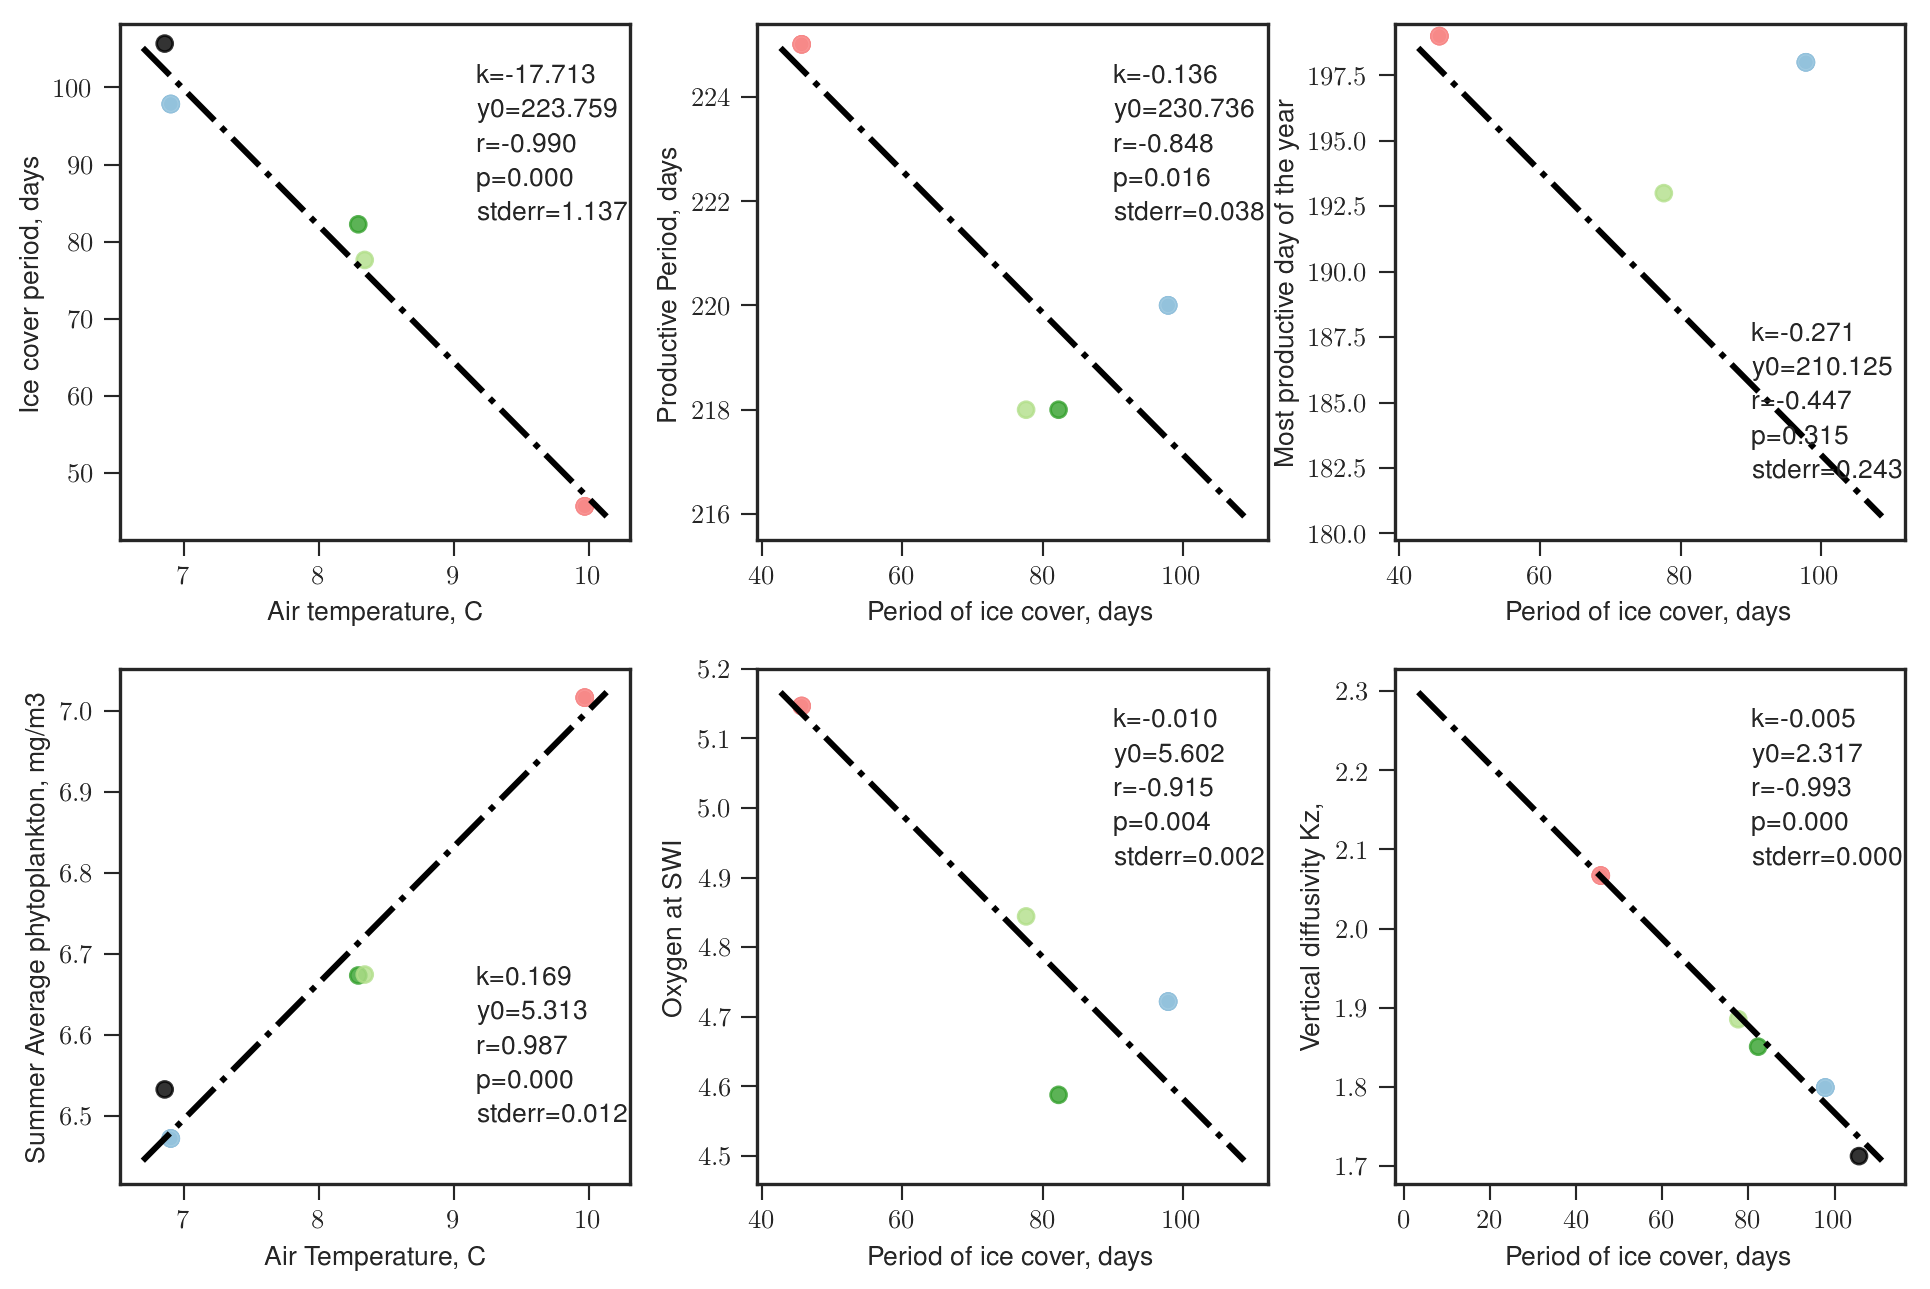

In [80]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(12,8), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.25, hspace=0.25)

x, y=np.array(av_T), np.array(ice_bool_int_yearly)
ax1=sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax1)
lr = linregress(np.array(av_T), np.array(ice_bool_int_yearly))
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax1.text(0.7, 0.9-i/15, s+'{:.3f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax1.transAxes)
ax1.set_ylabel('Ice cover period, days')
ax1.set_xlabel('Air temperature, C')


y, x = np.array(days_of_bloom_1mg), np.array(ice_bool_int_yearly)
ax2 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax2)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax2.text(0.7, 0.9-i/15, s+'{:.3f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax2.transAxes)
ax2.set_ylabel(r'Productive Period, days')
ax2.set_xlabel('Period of ice cover, days')



y, x = np.array(max_grow_DOY), np.array(ice_bool_int_yearly)
ax3 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax3)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax3.text(0.7, 0.4-i/15, s+'{:.3f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax3.transAxes)
ax3.set_xlabel('Period of ice cover, days')
ax3.set_ylabel('Most productive day of the year')



y, x = np.array(phy_may_sept_mean), np.array(av_T)
ax4 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax4)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax4.text(0.7, 0.4-i/15, s+'{:.3f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax4.transAxes)
ax4.set_ylabel('Summer Average phytoplankton, mg/m3')
ax4.set_xlabel('Air Temperature, C')






y, x = np.array(oxy_int_yearly)*1e-3, np.array(ice_bool_int_yearly)
ax5 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax5)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax5.text(0.7, 0.9-i/15, s+'{:.3f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax5.transAxes)
# ax6.legend_.remove()
ax5.set_ylabel('Oxygen at SWI')
ax5.set_xlabel('Period of ice cover, days')


y, x = np.array(Kz_av), np.array(ice_bool_int_yearly)

ax6 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax6)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax6.text(0.7, 0.9-i/15, s+'{:.3f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax6.transAxes)
# ax5.legend_.remove()
ax6.set_ylabel('Vertical diffusivity Kz, ')
ax6.set_xlabel('Period of ice cover, days')
# ax6.relim()      # make sure all the data fits
# ax6.autoscale()
ax6.set_xlim(41,108)
ax6.set_ylim(1.7,2.1)

for ax in [ax1, ax2,ax3, ax4,ax5, ax6]:
    ax.relim()      # make sure all the data fits
    ax.autoscale()


ax

# ax1.grid(linestyle='-', linewidth=0.2)
# ax2.grid(linestyle='-', linewidth=0.2)
# ax3.grid(linestyle='-', linewidth=0.2)

# plt.xlim(1,53)
# plt.title('2040-2050 Mean Phy')

In [81]:
ax1.lines

(18, 28)

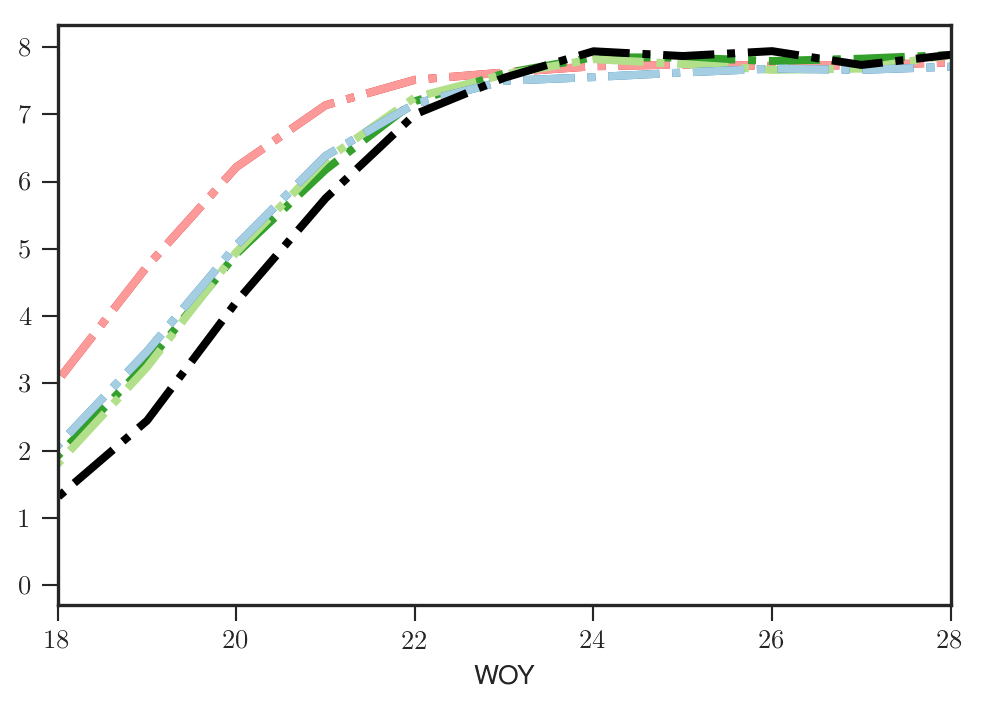

In [82]:
ax = Phy[-365*last_years:].groupby([pivot]).mean()[names_scen].plot(linestyle='-.', lw=3, color=clr_pltt)
ax.legend_.remove()
ax.set_xlim(18,28)

(18, 28)

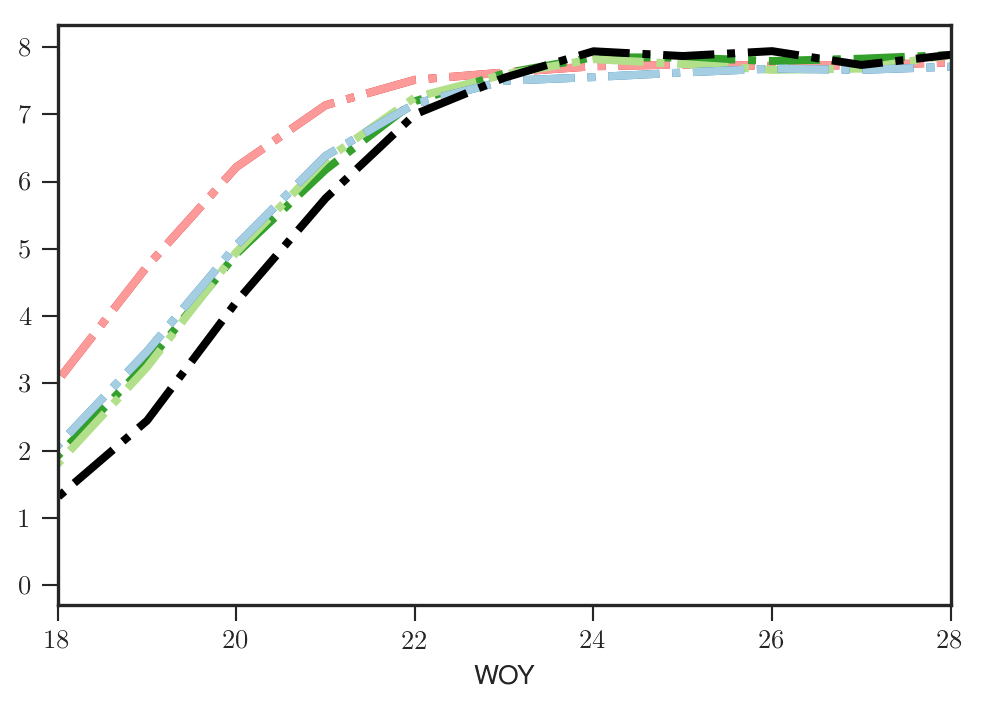

In [83]:
ax = Phy[-365*last_years:].groupby([pivot]).mean()[names_scen].plot(linestyle='-.', lw=3, color=clr_pltt)
ax.legend_.remove()
ax.set_xlim(18,28)

Text(0,0.5,'max grow DOY')

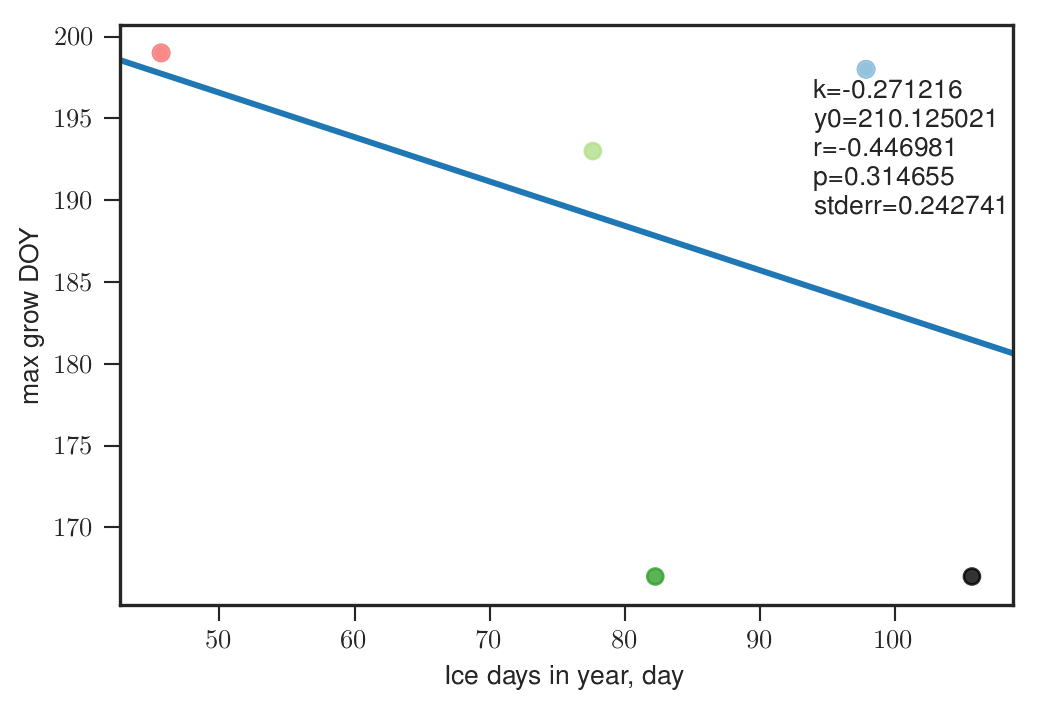

In [84]:
y, x = np.array(max_grow_DOY), np.array(ice_bool_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Ice days in year, day')
plt.ylabel('max grow DOY')

In [85]:
max_ice_h = Ice[-365*last_years:].groupby(['DOY']).mean()[names_scen].max().values
max_grow_DOY = Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmax().values
ice_break_up = Ice[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmin().values

Text(0,0.5,'Day of blooms')

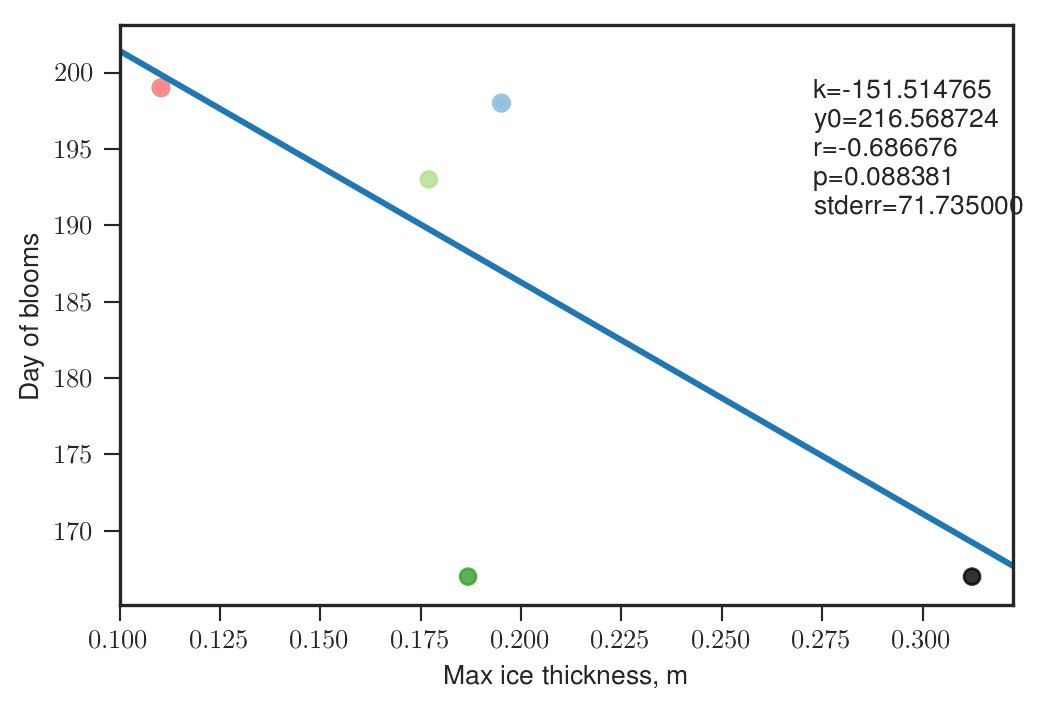

In [86]:
y, x = np.array(max_grow_DOY), np.array(max_ice_h)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Max ice thickness, m')
plt.ylabel('Day of blooms')

Text(0,0.5,'Day of blooms')

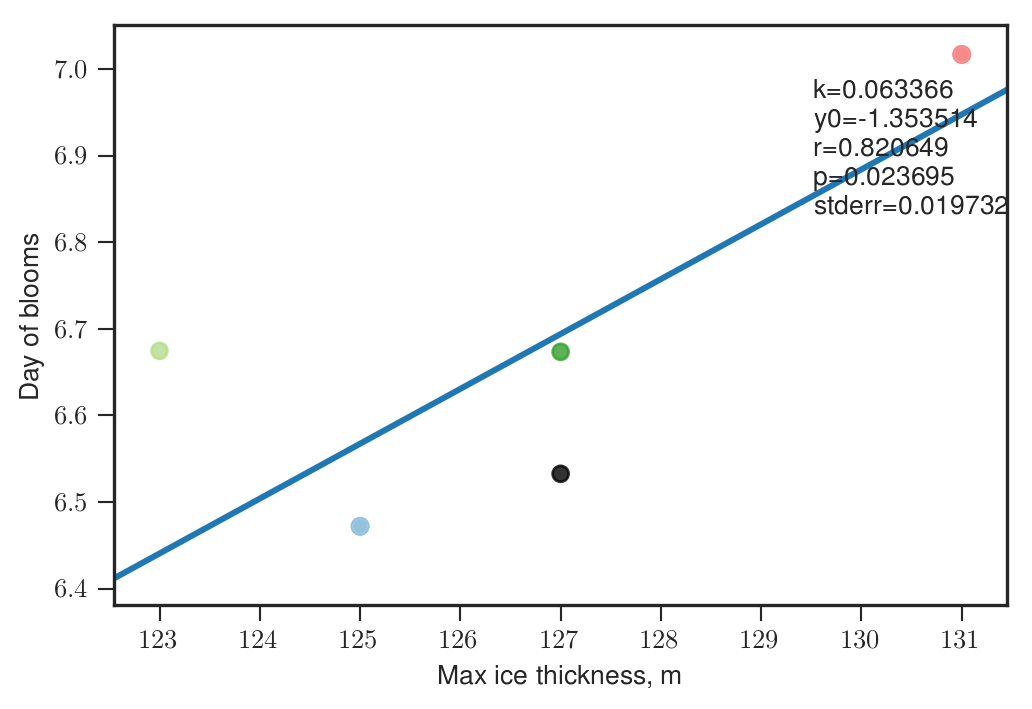

In [87]:
y, x = np.array(phy_may_sept_mean), np.array(ice_break_up)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Max ice thickness, m')
plt.ylabel('Day of blooms')

Text(0,0.5,'Day of blooms')

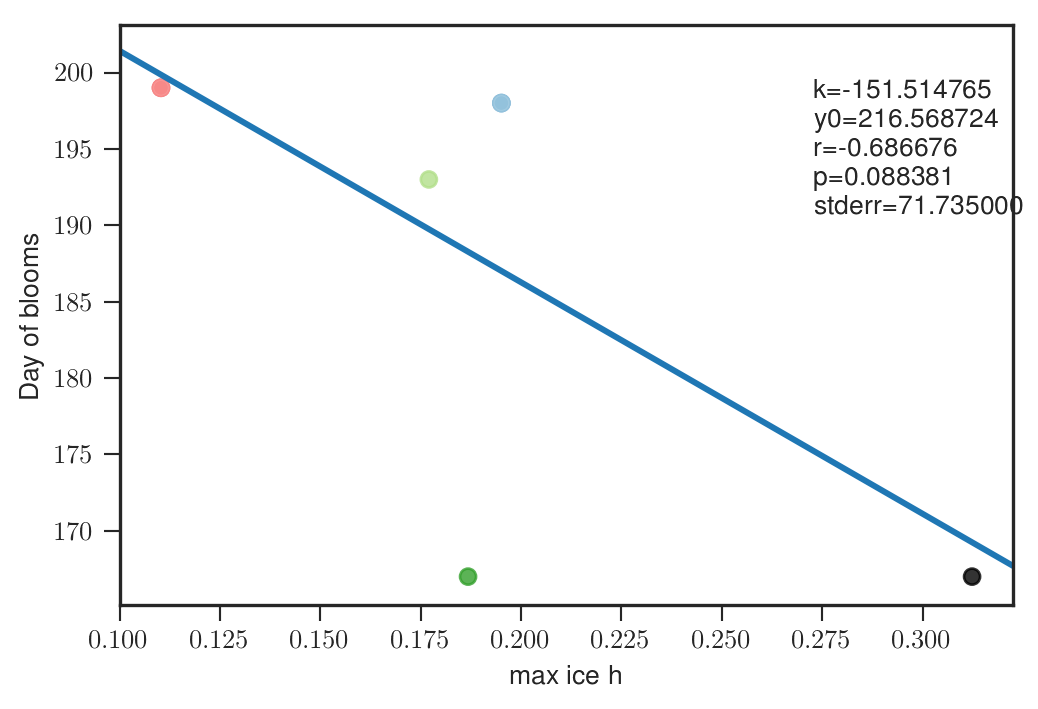

In [88]:
y, x = np.array(max_grow_DOY), np.array(max_ice_h)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('max ice h')
plt.ylabel('Day of blooms')

In [89]:
pd.to_datetime('2000160', format='%Y%j')

Timestamp('2000-06-08 00:00:00')

Text(0,0.5,'Date of the maximum rate of grow')

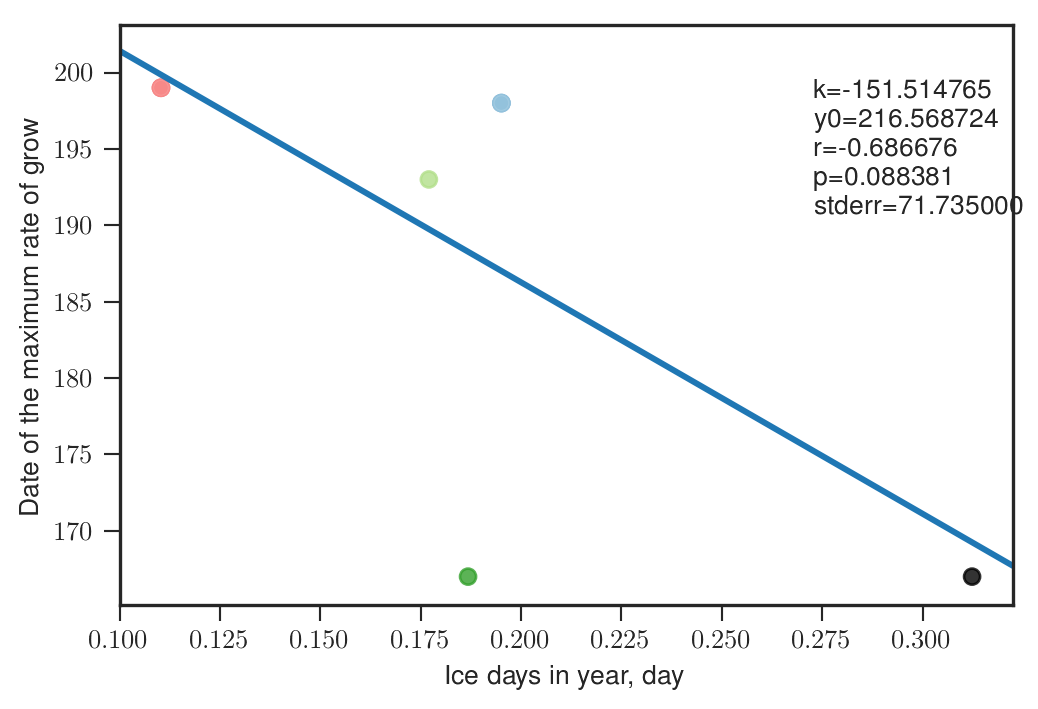

In [90]:
y, x = np.array(max_grow_DOY), np.array(max_ice_h)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Ice days in year, day')
plt.ylabel('Date of the maximum rate of grow')
# plt.ylim(2,2.3)

In [91]:
phy_may_sept_mean = Phy[-365*last_years:][(Phy.DOY>120) & (Phy.DOY<275)].groupby(['DOY']).mean()[names_scen].mean()

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Text(0,0.5,'phy may sept mean')

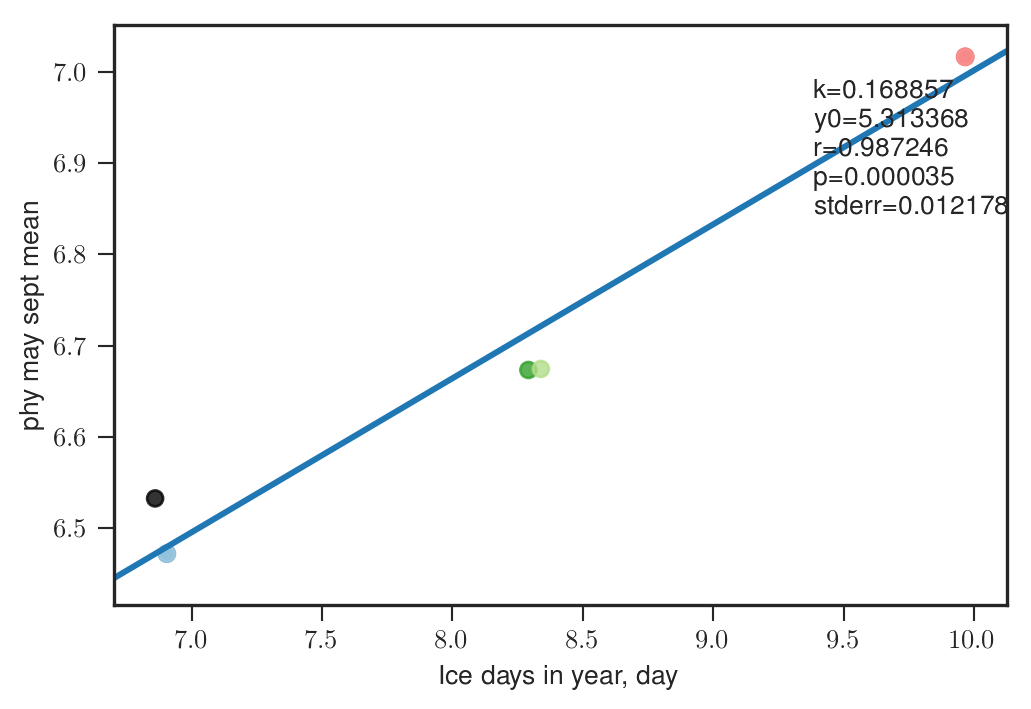

In [92]:
y, x = np.array(phy_may_sept_mean), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Ice days in year, day')
plt.ylabel('phy may sept mean')
# plt.ylim(2,2.3)

In [93]:
phy_mass = 1
days_of_bloom_1mg = ((Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass)[::-1].idxmin() - (Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass).idxmin()).values

Text(0,0.5,'Phy more than 1 mg/m3, days')

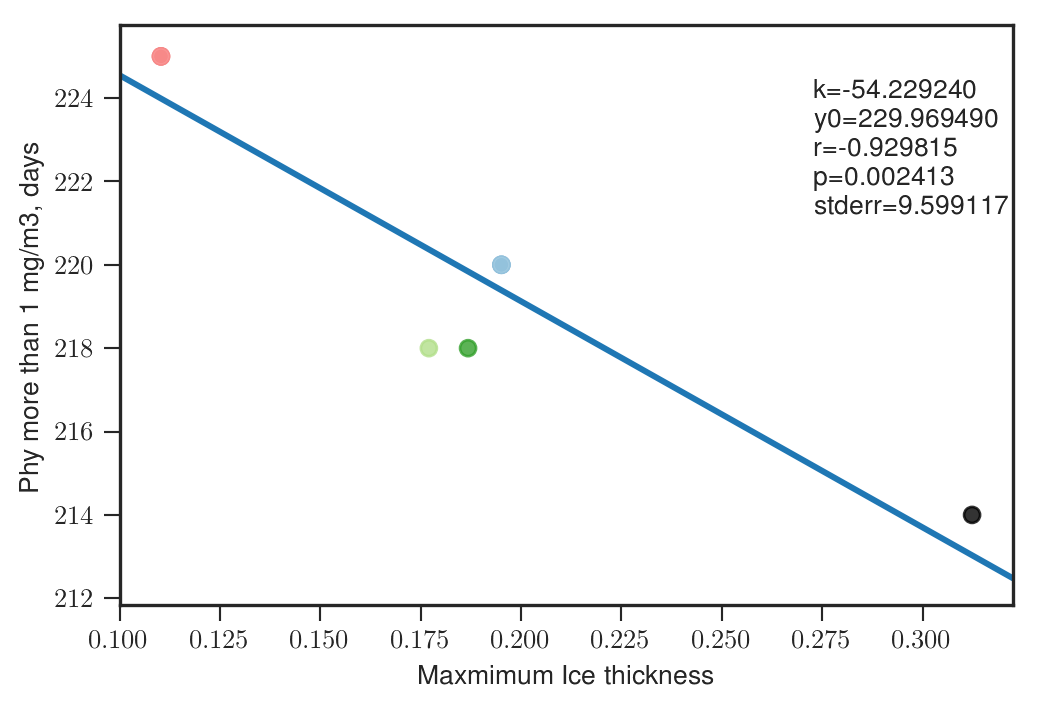

In [94]:
y, x = np.array(days_of_bloom_1mg), np.array(max_ice_h)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Maxmimum Ice thickness')
plt.ylabel('Phy more than 1 mg/m3, days')
# plt.ylim(2,2.3)

Text(0.5,0,'Period with ice cover, days')

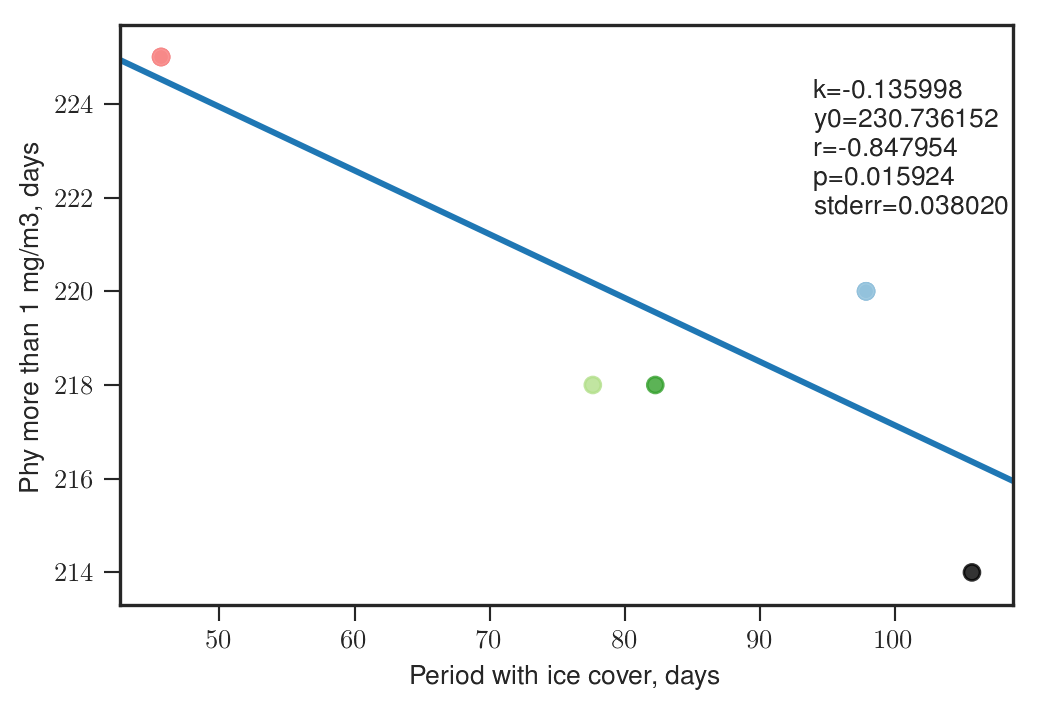

In [95]:
y, x = np.array(days_of_bloom_1mg), np.array(ice_bool_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Phy more than 1 mg/m3, days')
plt.xlabel('Period with ice cover, days')
# plt.ylim(2,2.3)

Text(0.5,0,'Air Temperature, C')

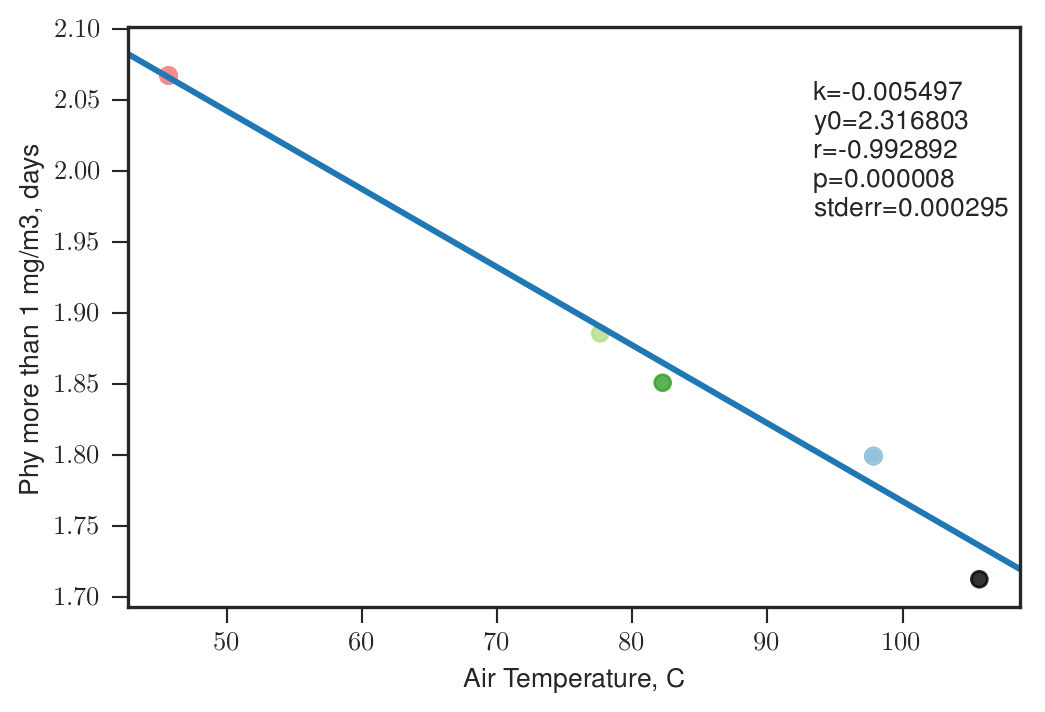

In [96]:
y, x = np.array( Kz_av ), np.array(ice_bool_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Phy more than 1 mg/m3, days')
plt.xlabel('Air Temperature, C')
# plt.ylim(2,2.3)

Text(0.5,0,'Air Temperature, C')

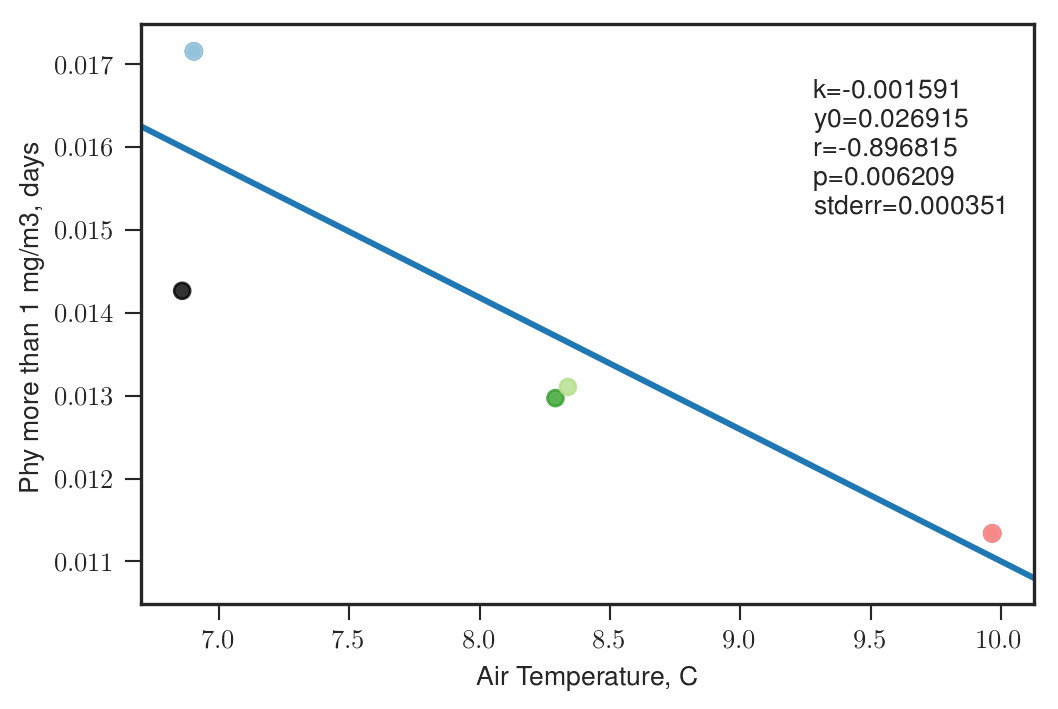

In [97]:
y, x = np.array(-Chl_fx[names_scen].mean()) / np.array(phy_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Phy more than 1 mg/m3, days')
plt.xlabel('Air Temperature, C')
# plt.ylim(2,2.3)

Text(0.5,0,'Air Temperature, C')

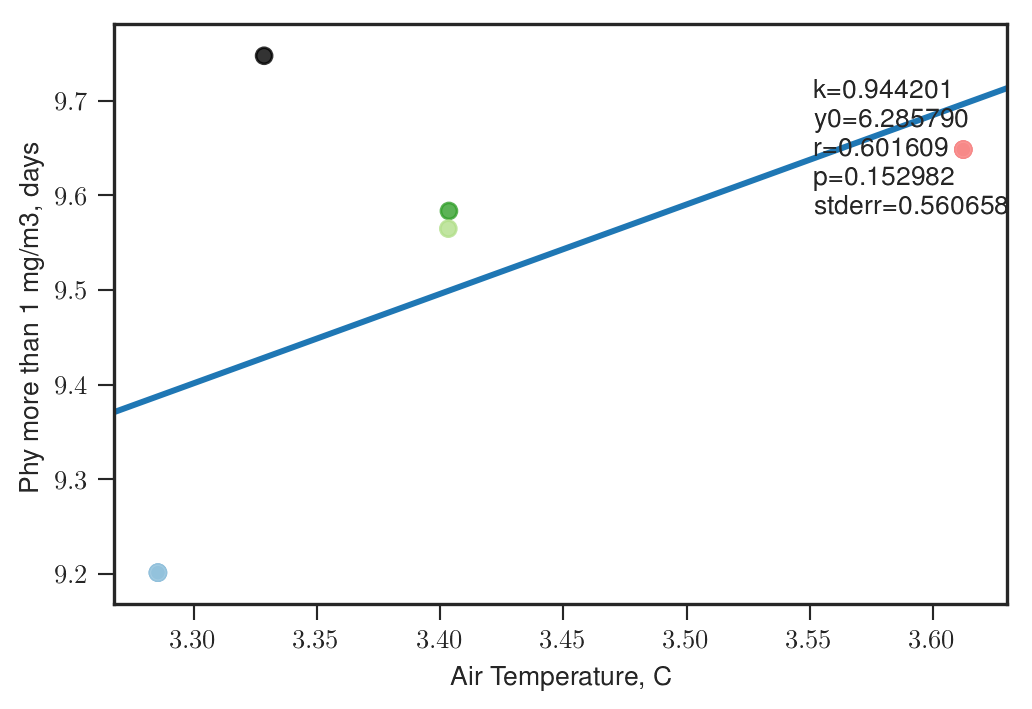

In [98]:
y, x = np.array(PO4_4m[names_scen].mean()), np.array(phy_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Phy more than 1 mg/m3, days')
plt.xlabel('Air Temperature, C')
# plt.ylim(2,2.3)

Text(0.5,0,'Ice covered pertiods')

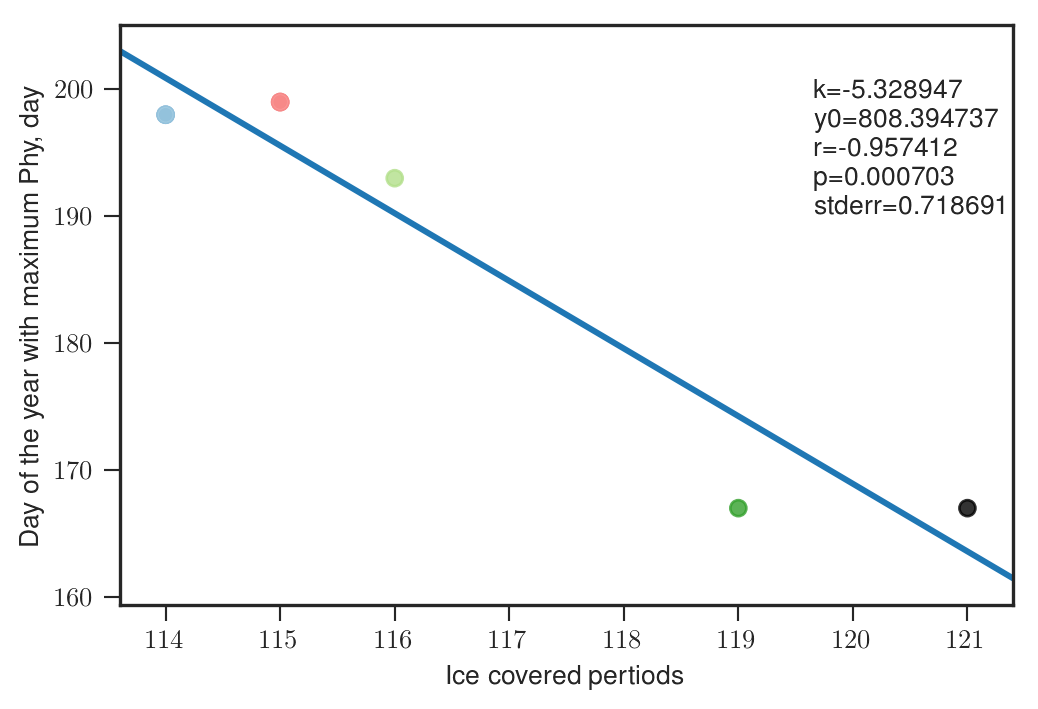

In [99]:
y, x = np.array(max_grow_DOY), np.array((Ice.groupby(['DOY']).mean()[names_scen] > 0.01).idxmin())
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Day of the year with maximum Phy, day')
plt.xlabel('Ice covered pertiods')
# plt.ylim(2,2.3)

In [100]:
pycno_depth[-365*last_years:][(pycno_depth.DOY>100) & (pycno_depth.DOY<270)].groupby(['DOY']).mean()[names_scen].mean()

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


RCP8 IPSL 2015-2070       9.784783
RCP4 IPSL 2015-2070       9.784783
RCP8 GFDL 2015-2070      10.217528
RCP4 GFDL 2015-2070      10.375828
RCP8 NorESM 2015-2070    13.093694
RCP4 NorESM 2015-2070    13.093694
Historical 1995-2015     10.229593
dtype: float64

In [101]:
-Chl_fx[names_scen].mean()

RCP8 IPSL 2015-2070      0.040960
RCP4 IPSL 2015-2070      0.040960
RCP8 GFDL 2015-2070      0.044147
RCP4 GFDL 2015-2070      0.044601
RCP8 NorESM 2015-2070    0.056361
RCP4 NorESM 2015-2070    0.056361
Historical 1995-2015     0.047482
dtype: float64

In [102]:
PO4_4m[names_scen].mean()

RCP8 IPSL 2015-2070      9.648453
RCP4 IPSL 2015-2070      9.648453
RCP8 GFDL 2015-2070      9.583588
RCP4 GFDL 2015-2070      9.564887
RCP8 NorESM 2015-2070    9.201532
RCP4 NorESM 2015-2070    9.201532
Historical 1995-2015     9.747509
dtype: float64

In [103]:
p_int_each_year = []
o_int_each_year = []
oxy_int_each_year = []
phy_int_each_year = []
ice_bool_int_each_year = []
ice_int_each_year = []
av_T_each_year = []

for y in np.arange(2015, 2070):
    for scen in names_scen:
        p_int_each_year.append(trapz(P_fx[P_fx.Year==y][scen], dx=1./365))
        o_int_each_year.append(trapz(O2_fx[O2_fx.Year==y][scen], dx=1./365))
        phy_int_each_year.append(trapz(Phy[Phy.Year==y][scen], dx=1./365))
        ice_int_each_year.append(trapz(Ice[Ice.Year==y][scen], dx=1./365))
        ice_bool_int_each_year.append(trapz(Ice_bool[Ice.Year==y][scen], dx=1))
        av_T_each_year.append(Tair[Tair.Year==y][scen].mean())
        oxy_int_each_year.append(Oxy[Oxy.Year==y][scen].mean())

Text(0.5,0,'Ice covered pertiods')

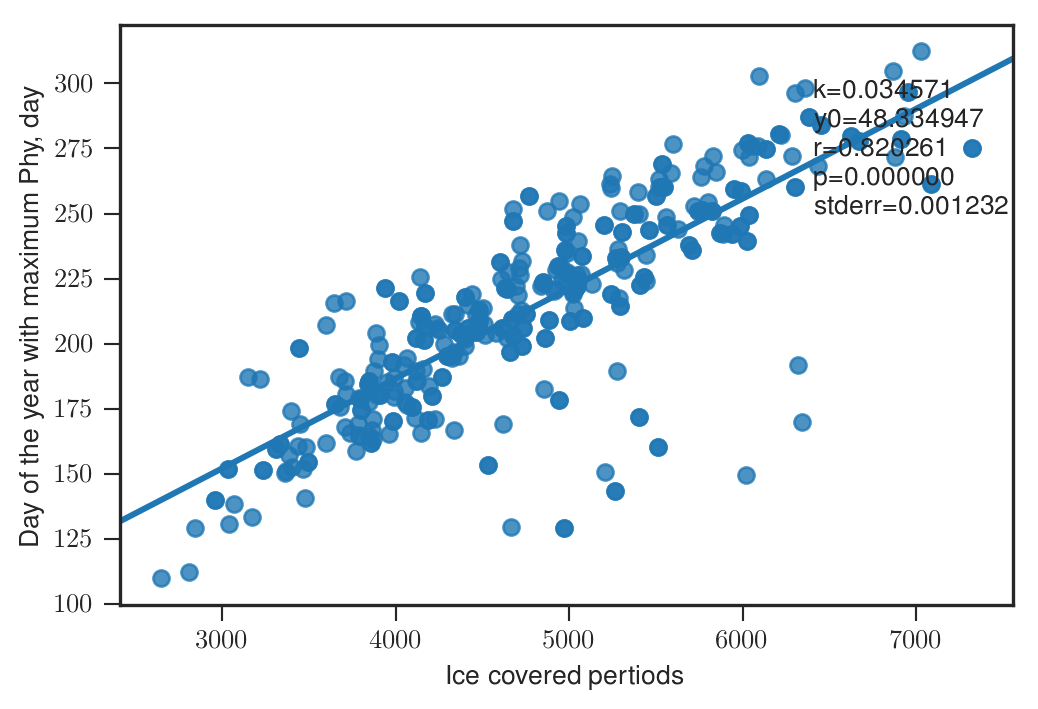

In [104]:
y, x = np.array(o_int_each_year), np.array(oxy_int_each_year)
sns.regplot(x, y, ci=None)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Day of the year with maximum Phy, day')
plt.xlabel('Ice covered pertiods')
# plt.ylim(2,2.3)

In [105]:
p_int_yearly = []
pui_int_yearly = [] #under ice cover
pni_int_yearly = [] #under ice cover
fe_fx_ui_int_yearly = [] #under ice cover
fe_fx_ni_int_yearly = [] #no ice cover
o_int_yearly = []
o_ui_int_yearly = []
o_ni_int_yearly = []
oxy_int_yearly = []
oxy_ui_int_yearly = []
oxy_ni_int_yearly = []
ice_int_yearly = []
ice_bool_int_yearly = []
phy_int_yearly = []
av_T = []
fe_int_yearly = []
Kz_av = []
days_of_bloom_1mg = []
phy_may_sept_mean = []
max_grow_DOY = []

for y in np.arange(2016, 2070):
    for scen in names_scen:
        ice_days = Ice_bool[Ice_bool.Year==y][scen].mean()*365
        ice_bool_int_yearly.append(ice_days)
        p_int_yearly.append(P_fx[P_fx.Year==y][scen].mean())
        pui_int_yearly.append(P_fx[P_fx.Year==y][Ice_bool[Ice_bool.Year==y][scen]>0][scen].mean())
        pni_int_yearly.append(P_fx[P_fx.Year==y][Ice_bool[Ice_bool.Year==y][scen]==0][scen].mean())
        fe_fx_ui_int_yearly.append(Fe2_fx[Fe2_fx.Year==y][Ice_bool[Ice_bool.Year==y][scen]>0][scen].mean())
        fe_fx_ni_int_yearly.append(Fe2_fx[Fe2_fx.Year==y][Ice_bool[Ice_bool.Year==y][scen]==0][scen].mean())
        fe_int_yearly.append(Fe2_fx[Fe2_fx.Year==y][scen].mean())
        o_int_yearly.append(O2_fx[O2_fx.Year==y][scen].mean())
        o_ui_int_yearly.append(O2_fx[O2_fx.Year==y][Ice_bool[Ice_bool.Year==y][scen]==0][scen].mean())
        o_ni_int_yearly.append(O2_fx[O2_fx.Year==y][Ice_bool[Ice_bool.Year==y][scen]>0][scen].mean())
        oxy_int_yearly.append(Oxy[Oxy.Year==y][scen].mean())
        oxy_ui_int_yearly.append(Oxy[Oxy.Year==y][Ice_bool[Ice_bool.Year==y][scen]==0][scen].mean())
        oxy_ni_int_yearly.append(Oxy[Oxy.Year==y][Ice_bool[Ice_bool.Year==y][scen]>0][scen].mean())
        ice_int_yearly.append(Ice[Ice.Year==y][scen].mean())
        av_T.append(Tair[Tair.Year==y][scen].mean())
        phy_int_yearly.append(Phy[Phy.Year==y][scen].mean())
        days_of_bloom_1mg.append((Phy[Phy.Year==y].groupby(['DOY']).mean()[scen] < phy_mass)[::-1].idxmin() - (Phy[Phy.Year==y].groupby(['DOY']).mean()[scen] < phy_mass).idxmin())
        phy_may_sept_mean.append( Phy[Phy.Year==y][(Phy[Phy.Year==y].DOY>120) & (Phy[Phy.Year==y].DOY<275)].groupby(['DOY']).mean()[scen].mean())
        max_grow_DOY.append( Phy[Phy.Year==y].groupby(['DOY']).mean().diff()[scen].idxmax())
        Kz_av.append(Kz_mean[Kz_mean.Year==y][scen].mean()) 

In [106]:
lrs = pd.DataFrame({'ice days':ice_bool_int_yearly, 
#                     'ice thickness':ice_int_yearly, 
                    'phy':phy_int_yearly, 
                    'P flux':p_int_yearly, 
                    'T air':av_T, 
                    'o2 flux':o_int_yearly, 
                    'o2 flux under ice':o_ui_int_yearly, 
                    'o2 flux no ice':o_ni_int_yearly,  
                    'o2 C at SWI':oxy_int_yearly, 
                    'o2 C at SWI under ice':oxy_ui_int_yearly, 
                    'o2 C at SWI no ice':oxy_ni_int_yearly,  
                    'P flux under ice':pui_int_yearly,
                    'P flux no ice':pni_int_yearly,
                    'Fe2 flux under ice':fe_fx_ui_int_yearly,
                    'Fe2 flux no ice':fe_fx_ni_int_yearly,
                    'Kz average':Kz_av,
#                     'max ice thickness':max_ice_h,
                    'max grow DOY':max_grow_DOY,
#                     'ice break up day':ice_break_up,
                    'Fe2 flux':fe_int_yearly})

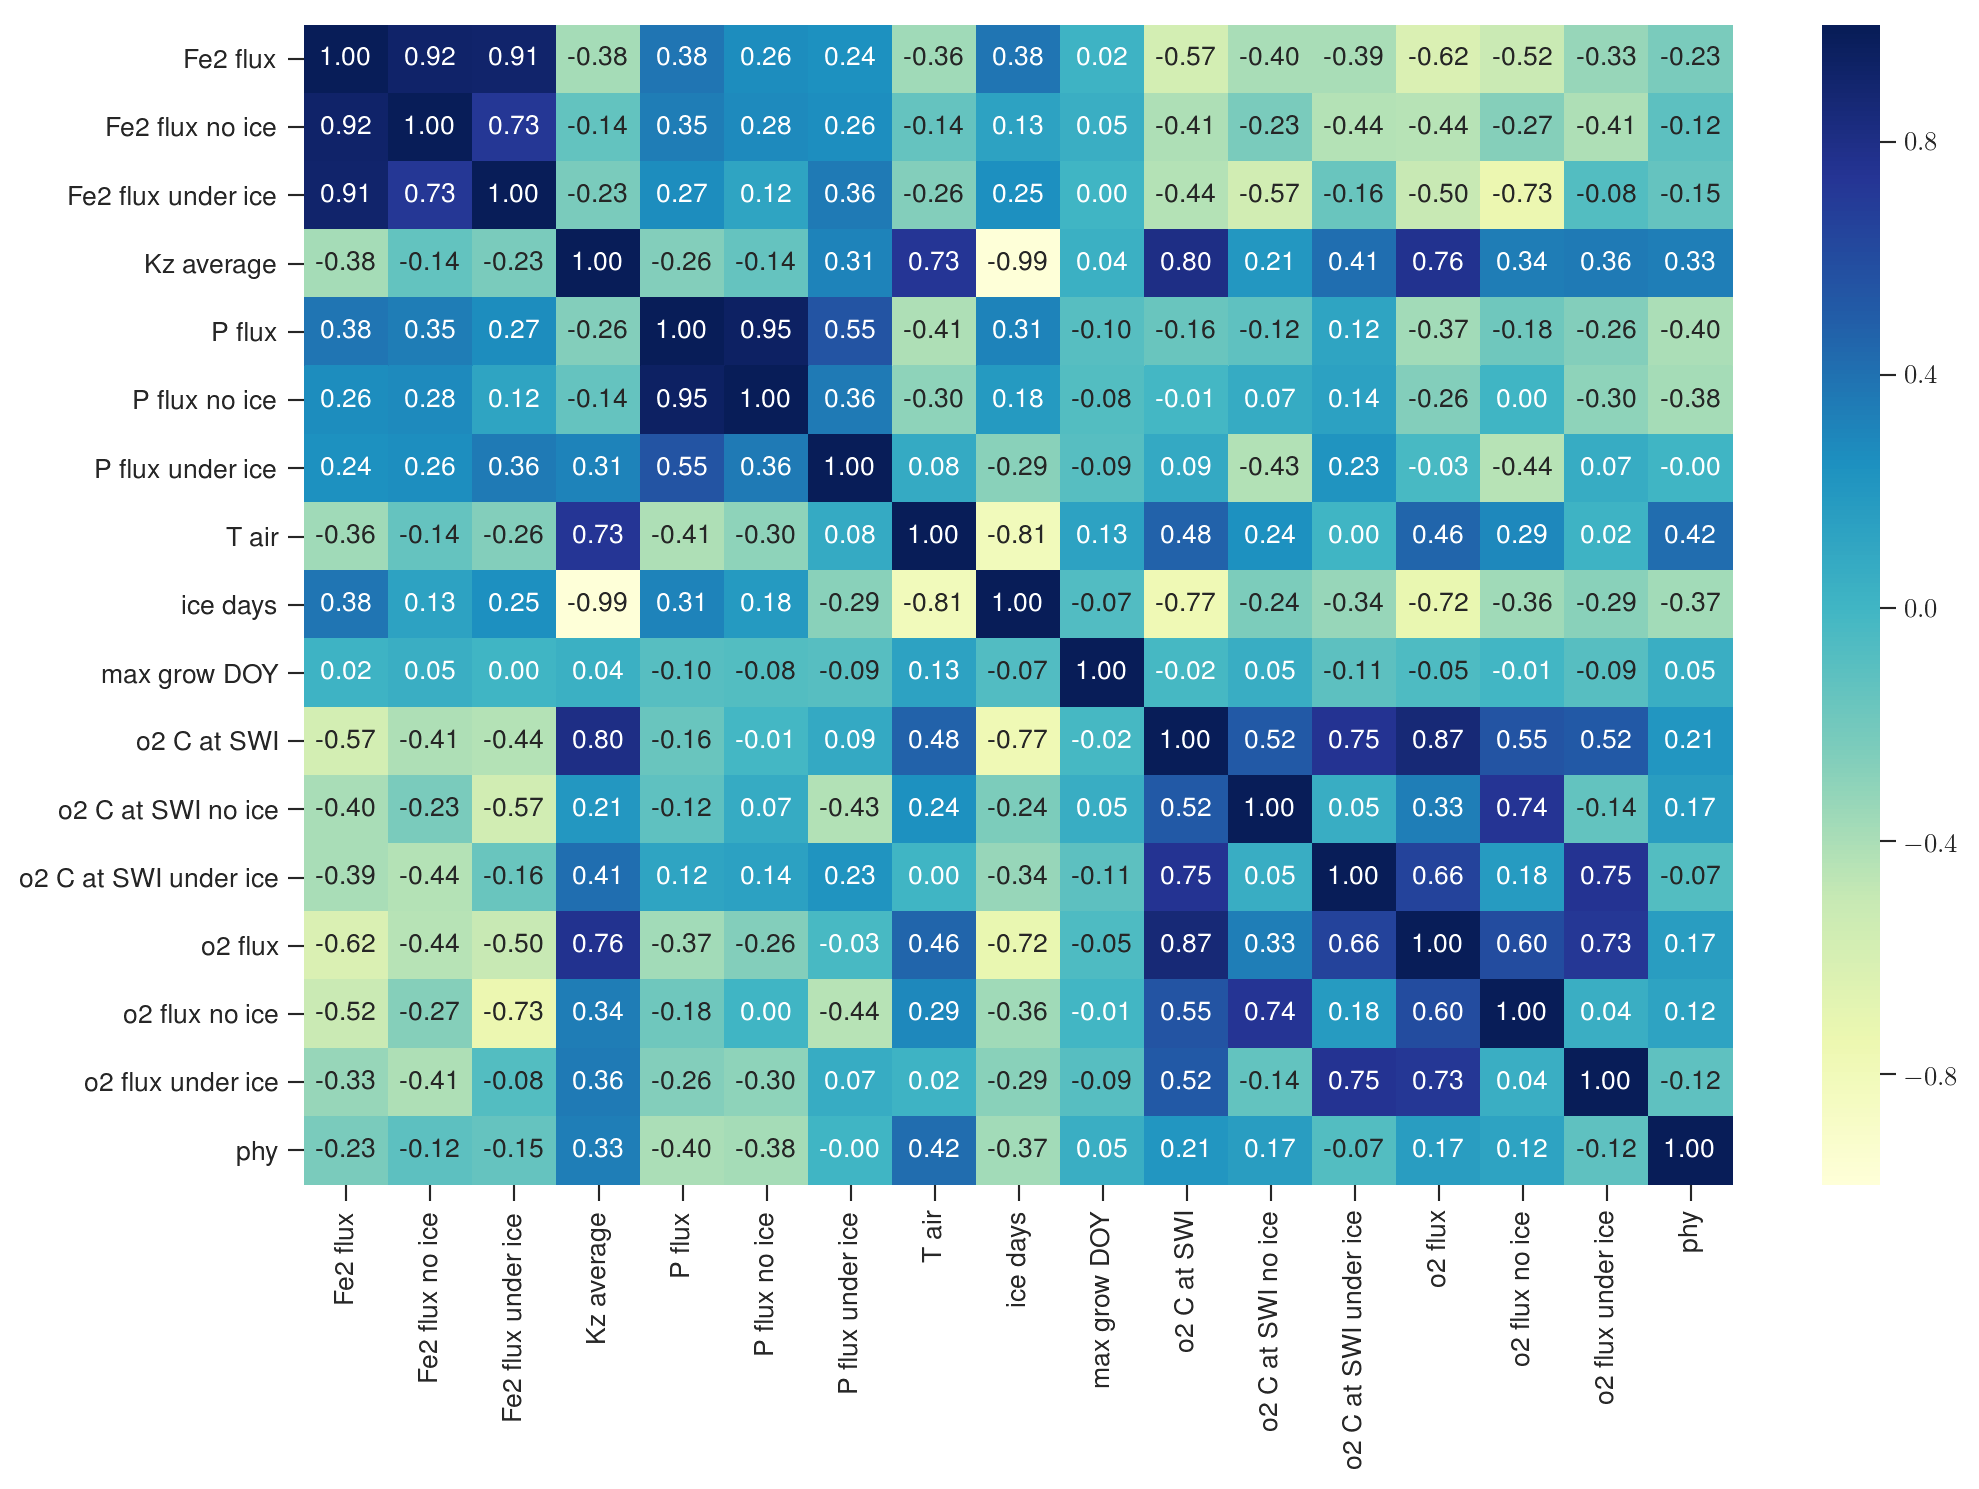

In [107]:
plt.figure(figsize=(12,8))
sns.heatmap(lrs.corr(), xticklabels=lrs.corr().columns, yticklabels=lrs.corr().columns, center=0,  annot=True, fmt='.2f', cmap="YlGnBu")

(1.25, 2.5)

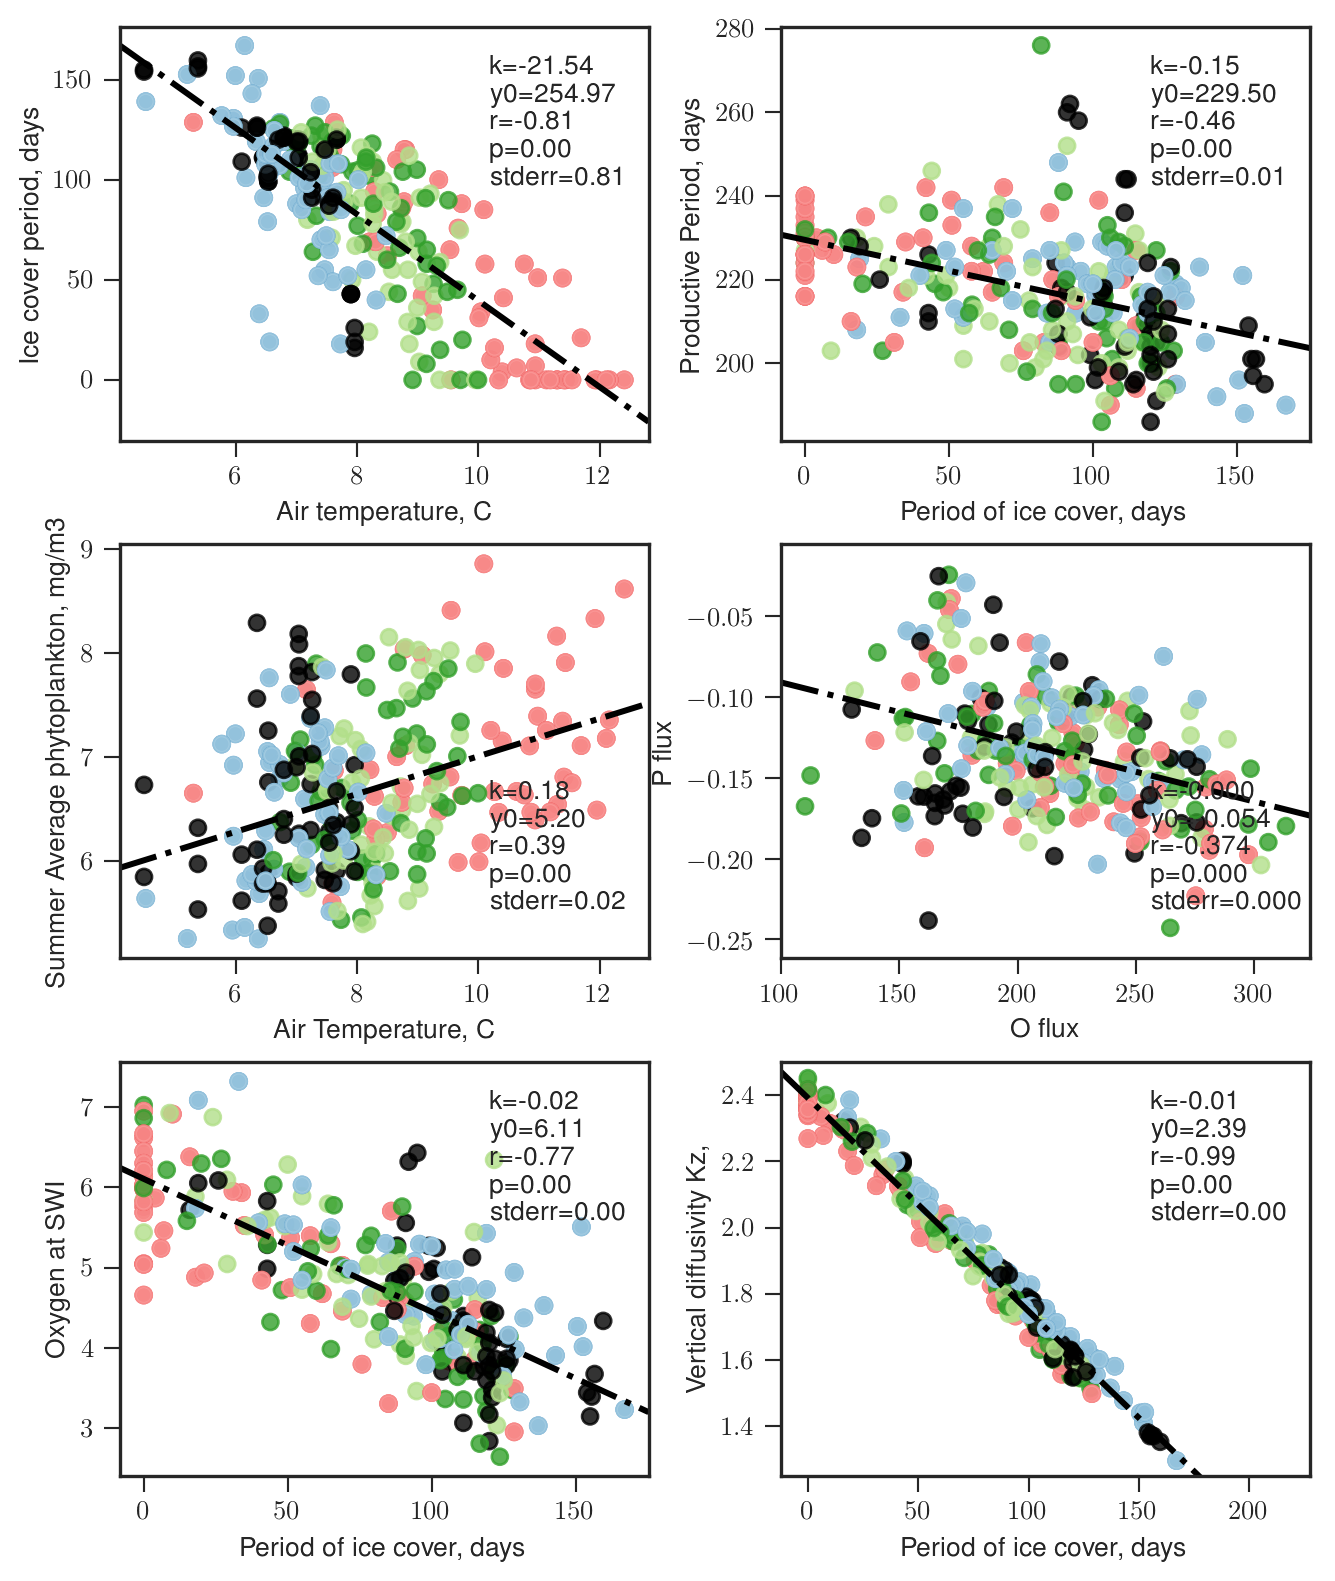

In [108]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(8,10), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.25, hspace=0.25)

x, y=np.array(av_T), np.array(ice_bool_int_yearly)
ax1=sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax1)
lr = linregress(np.array(av_T), np.array(ice_bool_int_yearly))
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax1.text(0.7, 0.9-i/15, s+'{:.2f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax1.transAxes)
ax1.set_ylabel('Ice cover period, days')
ax1.set_xlabel('Air temperature, C')


y, x = np.array(days_of_bloom_1mg), np.array(ice_bool_int_yearly)
ax2 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax2)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax2.text(0.7, 0.9-i/15, s+'{:.2f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax2.transAxes)
ax2.set_ylabel(r'Productive Period, days')
ax2.set_xlabel('Period of ice cover, days')



y, x = np.array(phy_may_sept_mean), np.array(av_T)
ax3 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax3)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax3.text(0.7, 0.4-i/15, s+'{:.2f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax3.transAxes)
ax3.set_ylabel('Summer Average phytoplankton, mg/m3')
ax3.set_xlabel('Air Temperature, C')



y, x = np.array(p_int_yearly), np.array(o_int_yearly)
ax4 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax4)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax4.text(0.7, 0.4-i/15, s+'{:.3f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax4.transAxes)
ax4.set_xlabel('O flux')
ax4.set_ylabel('P flux')


y, x = np.array(oxy_int_yearly)*1e-3, np.array(ice_bool_int_yearly)
ax5 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax5)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax5.text(0.7, 0.9-i/15, s+'{:.2f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax5.transAxes)
# ax6.legend_.remove()
ax5.set_ylabel('Oxygen at SWI')
ax5.set_xlabel('Period of ice cover, days')


y, x = np.array(Kz_av), np.array(ice_bool_int_yearly)

ax6 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax6)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax6.text(0.7, 0.9-i/15, s+'{:.2f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax6.transAxes)
# ax5.legend_.remove()
ax6.set_ylabel('Vertical diffusivity Kz, ')
ax6.set_xlabel('Period of ice cover, days')
# ax6.relim()      # make sure all the data fits
# ax6.autoscale()
# ax6.set_xlim(41,108)
ax6.set_ylim(1.25,2.5)






# ax1.grid(linestyle='-', linewidth=0.2)
# ax2.grid(linestyle='-', linewidth=0.2)
# ax3.grid(linestyle='-', linewidth=0.2)

# plt.xlim(1,53)
# plt.title('2040-2050 Mean Phy')